# Advanced Regression Assignment : Part I

### Author: Ashutosh Kumar
### Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


In [828]:
# import all libraries:

# import core python libraries:
import numpy as np
import pandas as pd
import re
import datetime


# import data visualisation libraries:
import matplotlib.pyplot as plt 
import seaborn as sns
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor


# supress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Step 1: Data Understanding, Visualisation and Preparation:

Importing data using the pandas library
Understanding the structure of the data

In [829]:
# reading the dataset:
house_df = pd.read_csv("train.csv")

In [830]:
# Having first glance of the car price data:

house_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [831]:
# Examining the dataset imported:

print(house_df.shape)


(1460, 81)


#### The original data set is having 1460 rows and 81 columns 



In [832]:
#Examining the data frame for the shape, datatypes, NUlls etc
print(house_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### So we have both numeric and aplhabetic features in the data-set given

### Missing Values Analysis for the DataSet:

In [833]:
#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)

# creating a function to identify the missing data in dataset:

def missing_data(data):
    #total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    countmissing = data.isnull().sum().sort_values(ascending=False)
    return pd.concat([countmissing, percent], axis=1, keys=['Missing Value Count','Percent Missing'])


In [834]:
missing_data(house_df).head(20)

Missing Value Count  Percent Missing
PoolQC                       1453            99.52
MiscFeature                  1406            96.30
Alley                        1369            93.77
Fence                        1179            80.75
FireplaceQu                   690            47.26
LotFrontage                   259            17.74
GarageCond                     81             5.55
GarageType                     81             5.55
GarageYrBlt                    81             5.55
GarageFinish                   81             5.55
GarageQual                     81             5.55
BsmtExposure                   38             2.60
BsmtFinType2                   38             2.60
BsmtFinType1                   37             2.53
BsmtCond                       37             2.53
BsmtQual                       37             2.53
MasVnrArea                      8             0.55
MasVnrType                      8             0.55
Electrical                      1             0.07
Utilities                       0             0.00

#### So we have 19 columns out of 81 columns where values are missing.

Let's visualise the missing values in the data-set.



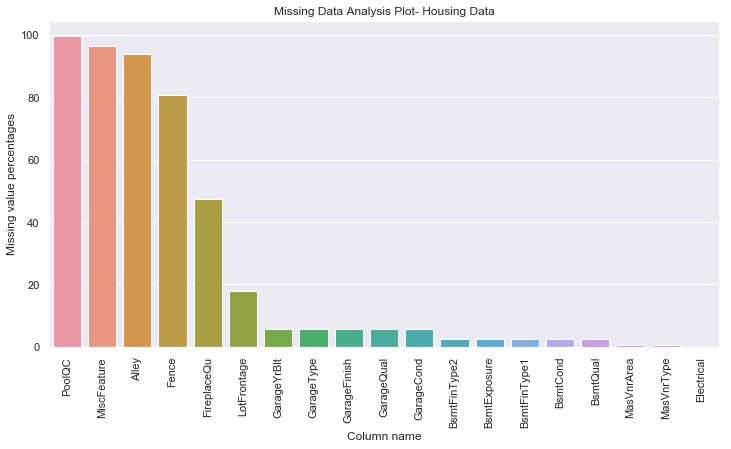

In [835]:
missing_data_df = (house_df.isnull().sum() / len(house_df)) * 100
missing_data_df = missing_data_df.drop(missing_data_df[missing_data_df == 0].index).sort_values(ascending=False)
#plt.title("Missing Values Visualisation")
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
plt.title('Missing Data Analysis Plot- Housing Data')
plt.xlabel("Column name")
plt.ylabel("Missing value percentages")
sns.barplot(x=missing_data_df.index, y=missing_data_df)
plt.show()

### Missing value treatment :

In [836]:
# Converting the NULL,NA missing values etc. to numpy nan as we will use it for the data cleaning:
house_df = house_df.replace([' ','NULL','NA'],np.nan)

# We will be proceeding with the missing value treatment on the order of the highest to lowest missing values.

In [837]:
# We can see that few of the features like PoolQC, Alley, Fence, MiscFeature are having more than 80 % of missing values.
# It does not makes sense to keep this columns in our model as they are not reliable and imputation is not recommended in such 
# scenarios.

# Dropping NULL columns based on more than 80 percentage missing values:
thresh = len(house_df) * .2
house_df.dropna(thresh = thresh, axis = 1, inplace = True)

In [838]:
# The data points where more than 30 percent of values are missing will not be adding value to our data-set. 
# Lets remove them: 
# Dropping rows where more than 30 percentage of values are missing:

house_df = house_df.dropna(thresh=len(house_df.columns)*0.5)

In [839]:
# Lets create functions to deal with null values :

# Looking at categorical values
def feature_exploration(column):
    return house_df[column].value_counts()

# Imputing the missing values
def feature_imputation(column, value):
    house_df.loc[house_df[column].isnull(),column] = value

In [840]:
# FireplaceQu: Fireplace quality(Categorical variable), currently 47 % values are missing, lets see the details of the
# data spread:
feature_exploration('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [841]:
# From the data definition we know that "NA" for the FirePlace means No FirePlace , so we can replace it by None
feature_imputation('FireplaceQu', 'None')

In [842]:
# LotFrontage: Linear feet of street connected to property (Numerical Variable), currently 17 % are missing values
# We will be imputing them with the median of the observations Neighborhood:

house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

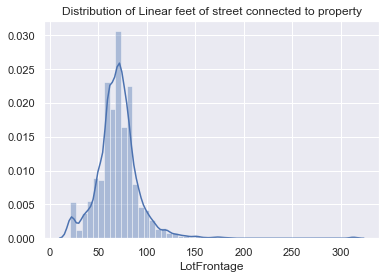

In [843]:
# Distribution of Linear feet of street connected to property:

plt.figure(figsize=(6,4))
plt.title("Distribution of Linear feet of street connected to property")
ax = sns.distplot(house_df["LotFrontage"])

In [844]:
# Most of house are having the street are of aroud 70 feet

In [845]:
# Let's re-look at missing data in dataset :
missing_data(house_df).head(15)


Missing Value Count  Percent Missing
GarageType                     81             5.55
GarageYrBlt                    81             5.55
GarageFinish                   81             5.55
GarageCond                     81             5.55
GarageQual                     81             5.55
BsmtExposure                   38             2.60
BsmtFinType2                   38             2.60
BsmtFinType1                   37             2.53
BsmtCond                       37             2.53
BsmtQual                       37             2.53
MasVnrType                      8             0.55
MasVnrArea                      8             0.55
Electrical                      1             0.07
RoofMatl                        0             0.00
RoofStyle                       0             0.00

In [846]:
# Moving ahead wrt GarageType, GarageYrBlt, GarageFinish, GarageCond and GarageQual are attributes related to Garage and all 
# of them are having same percenatge of missing values. This implies that the garrage does not exist in such house.

# GarageYrBlt: Year garage was built (Categorical)
# GarageType: Garage location (Categorical)
# GarageFinish: Interior finish of the garage(Categorical)
# GarageArea: Size of garage in square feet (Numerical)
# GarageQual: Garage quality(Categorical)

# As per Data definition NA in these fields means no garage

#GarageFinish: NA means "None"
#GarageQual: NA means "None"
#GarageCond: NA means "None"
#GarageYrBlt: NA means 0
#GarageType: NA means "None"

Garage_List1 = ['GarageFinish','GarageQual','GarageCond','GarageType']

# Updating garage categorical missing values with "None":
for feature in Garage_List1:
     house_df[feature].fillna('None',inplace=True)
        
# Similarly since no Garage means the Garage was never built, so replacing this numercial feature with 0:
feature_imputation('GarageYrBlt',0)

In [847]:
# Let's re-look at missing data in dataset :
missing_data(house_df).head(10)

Missing Value Count  Percent Missing
BsmtFinType2                   38             2.60
BsmtExposure                   38             2.60
BsmtQual                       37             2.53
BsmtFinType1                   37             2.53
BsmtCond                       37             2.53
MasVnrType                      8             0.55
MasVnrArea                      8             0.55
Electrical                      1             0.07
ExterQual                       0             0.00
RoofMatl                        0             0.00

In [848]:
# BsmtFinType2 : Rating of basement finished area (if multiple types)
# BsmtExposure : Refers to walkout or garden level walls

# Both are categorical basement feature with same missing percenatges , "NA" means no basement so lets impute them with "None":
feature_imputation('BsmtFinType2','None')
feature_imputation('BsmtExposure','None')

In [849]:
# BsmtQual: Evaluates the height of the basement
# BsmtFinType1: Rating of basement finished area
# BsmtCond: Evaluates the general condition of the basement

# All three are again basement categorcial features with the same missing values percentages, so "NA" implies no basement for
#these houses
# Lets impute them with "None" for now:

bsmt_list = ['BsmtQual','BsmtFinType1','BsmtCond']
for feature in bsmt_list:
     house_df[feature].fillna('None',inplace=True)
        


In [850]:
# Let's re-look at missing data in dataset :
missing_data(house_df).head(5)

Missing Value Count  Percent Missing
MasVnrType                    8             0.55
MasVnrArea                    8             0.55
Electrical                    1             0.07
SalePrice                     0             0.00
Foundation                    0             0.00

In [851]:
# MasVnrType: Masonry veneer type (Categorical)
# MasVnrArea: Masonry veneer area in square feet (Numerical)

# Missing values in those features mean that there is no masonry veneer in those houses.

# So we have most of the feature value as None (864) for this and very samll 0.55 % data is missing , lets impute with None
# and 0:
feature_imputation('MasVnrType','None')
feature_imputation('MasVnrArea',0)

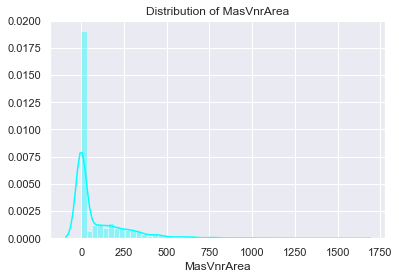

In [852]:
plt.figure(figsize=(6,4))
plt.title("Distribution of MasVnrArea")
ax = sns.distplot(house_df["MasVnrArea"].astype(int),color='cyan')

In [853]:
# Looks like highest most of houses does not have masonry veneer

In [854]:
# Electrical: Electrical system (Categorical)
feature_exploration('Electrical')


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [855]:
# This is having missing information with only 1 house, lets impute the same with mode (most found value):

house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical']).mode()[0]

In [856]:
# Let's have final look at missing data in dataset :
missing_data(house_df).head()

Missing Value Count  Percent Missing
SalePrice                      0              0.0
ExterCond                      0              0.0
RoofStyle                      0              0.0
RoofMatl                       0              0.0
Exterior1st                    0              0.0

In [857]:
# So we have completed the task of NULL value treatement/imputation for the given dataset.
# We dont have any missing value in the dataset.

### Understanding correlation in the dataset:

In [858]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = house_df.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.119174 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.332619  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageYrBlt    0.013491   -0.080997     0.104865  0.072599     0.288998   
GarageCars     0.016570   -0.040110     0.281393  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.349876  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

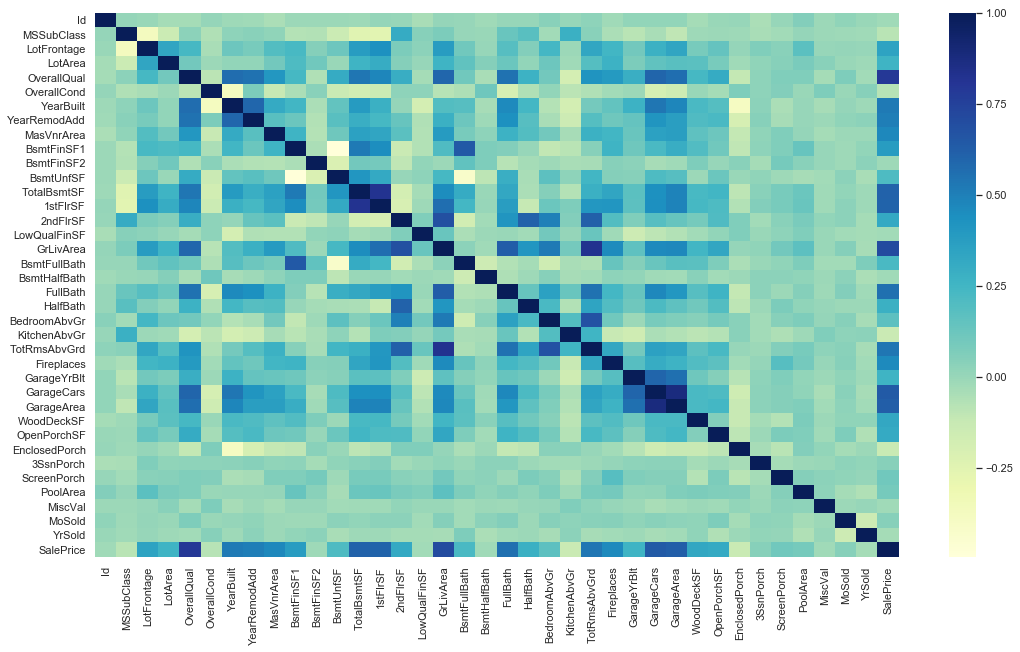

In [859]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [860]:
# It is very hard to interpret the correlation as of this stage, because of so many numercial features present in the dataset

In [861]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable sales price")

corr_initial = house_df.corr()['SalePrice']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(15)

Most important features relative to target variable sales price


Correlation
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876

In [862]:
# So we have top 15 correaltion with the target variable Sales Price as above and OverallQual, GrLivArea features seems to be 
# top 2 important features from the initial analysis.

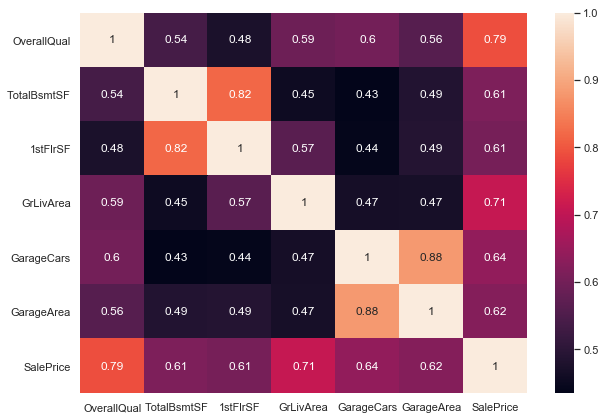

In [863]:
# Lets plot the heatmap again for only strong correlation (i.e. >0.6) with the target variable:

top_feature = cor.index[abs(cor['SalePrice']>0.6)]
plt.subplots(figsize=(10, 7))
top_corr = house_df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [864]:
# Clearly variables such as OverallQual, GrLivArea, GarageArea and TotalBsmtSF are having strongest correlation (positive)
# with the target variable "SalePrice"

In [865]:
# Traditional descriptive statistics of the columns:
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.199658   10516.828082     6.099315   
std     421.610009    42.300571    22.431902    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112799    30.202904     20.645407   180.731373   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1868.739726     1.767123   472.980137    94.244521    46.660274   
std     453.697295     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1958.000000     1.000000   334.500000     0.000000     0.000000   
50%    1977.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Outlier analysis, detection and treatment in the dataset:

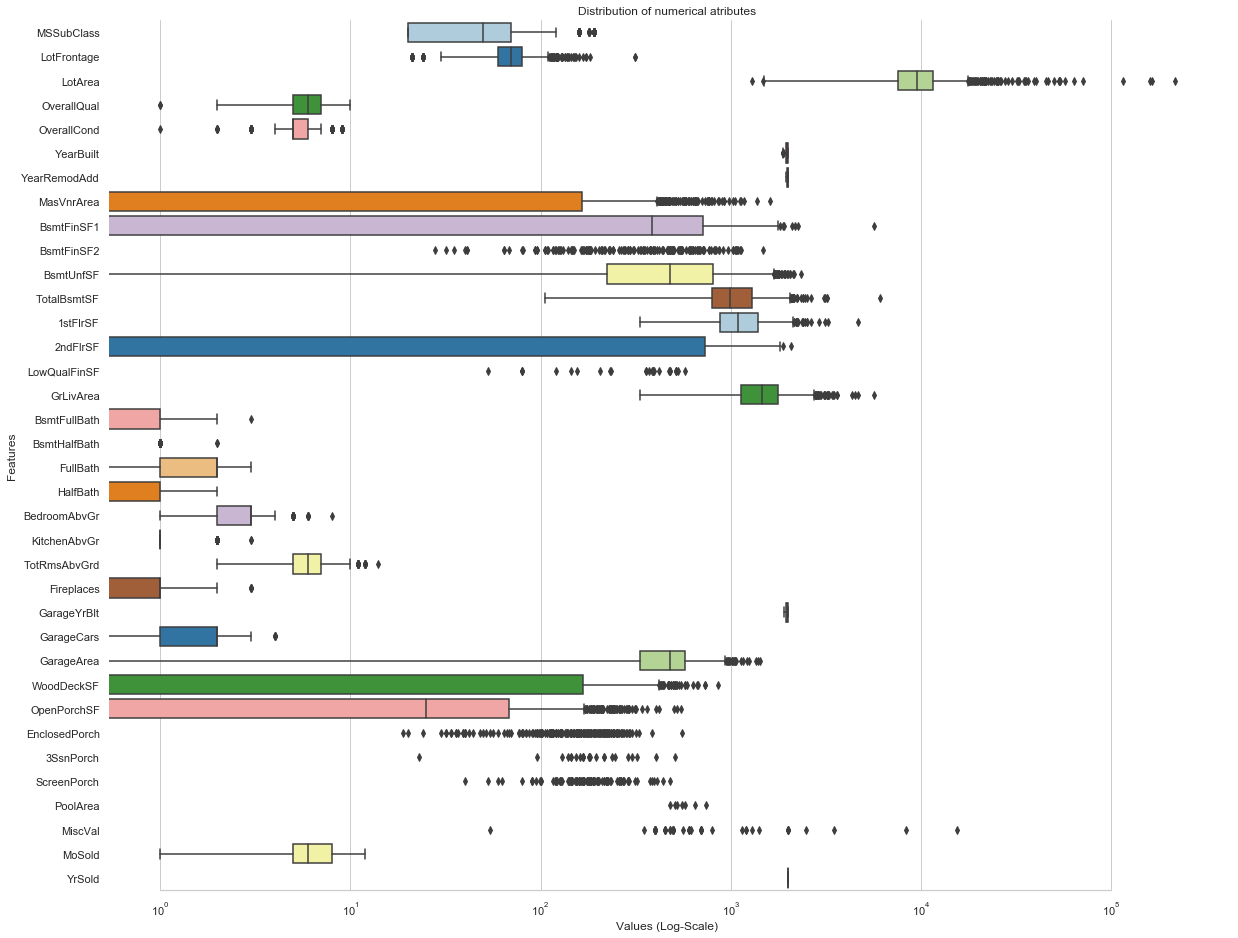

In [866]:
# Another look at the distribution of numerical attribute:

# Creating a list of dataframe columns which are numeric:
num_features = house_df.select_dtypes(include=[np.number]).columns.tolist()

li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Boxplot for the numerical features against the target sales price variable:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 16))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=house_df[li_plot_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True, left=True)

In [867]:
# We can find many outliers in the dataset
# Because of so many variables the plot looks little clumsy, so we will take fewer variables at a time.

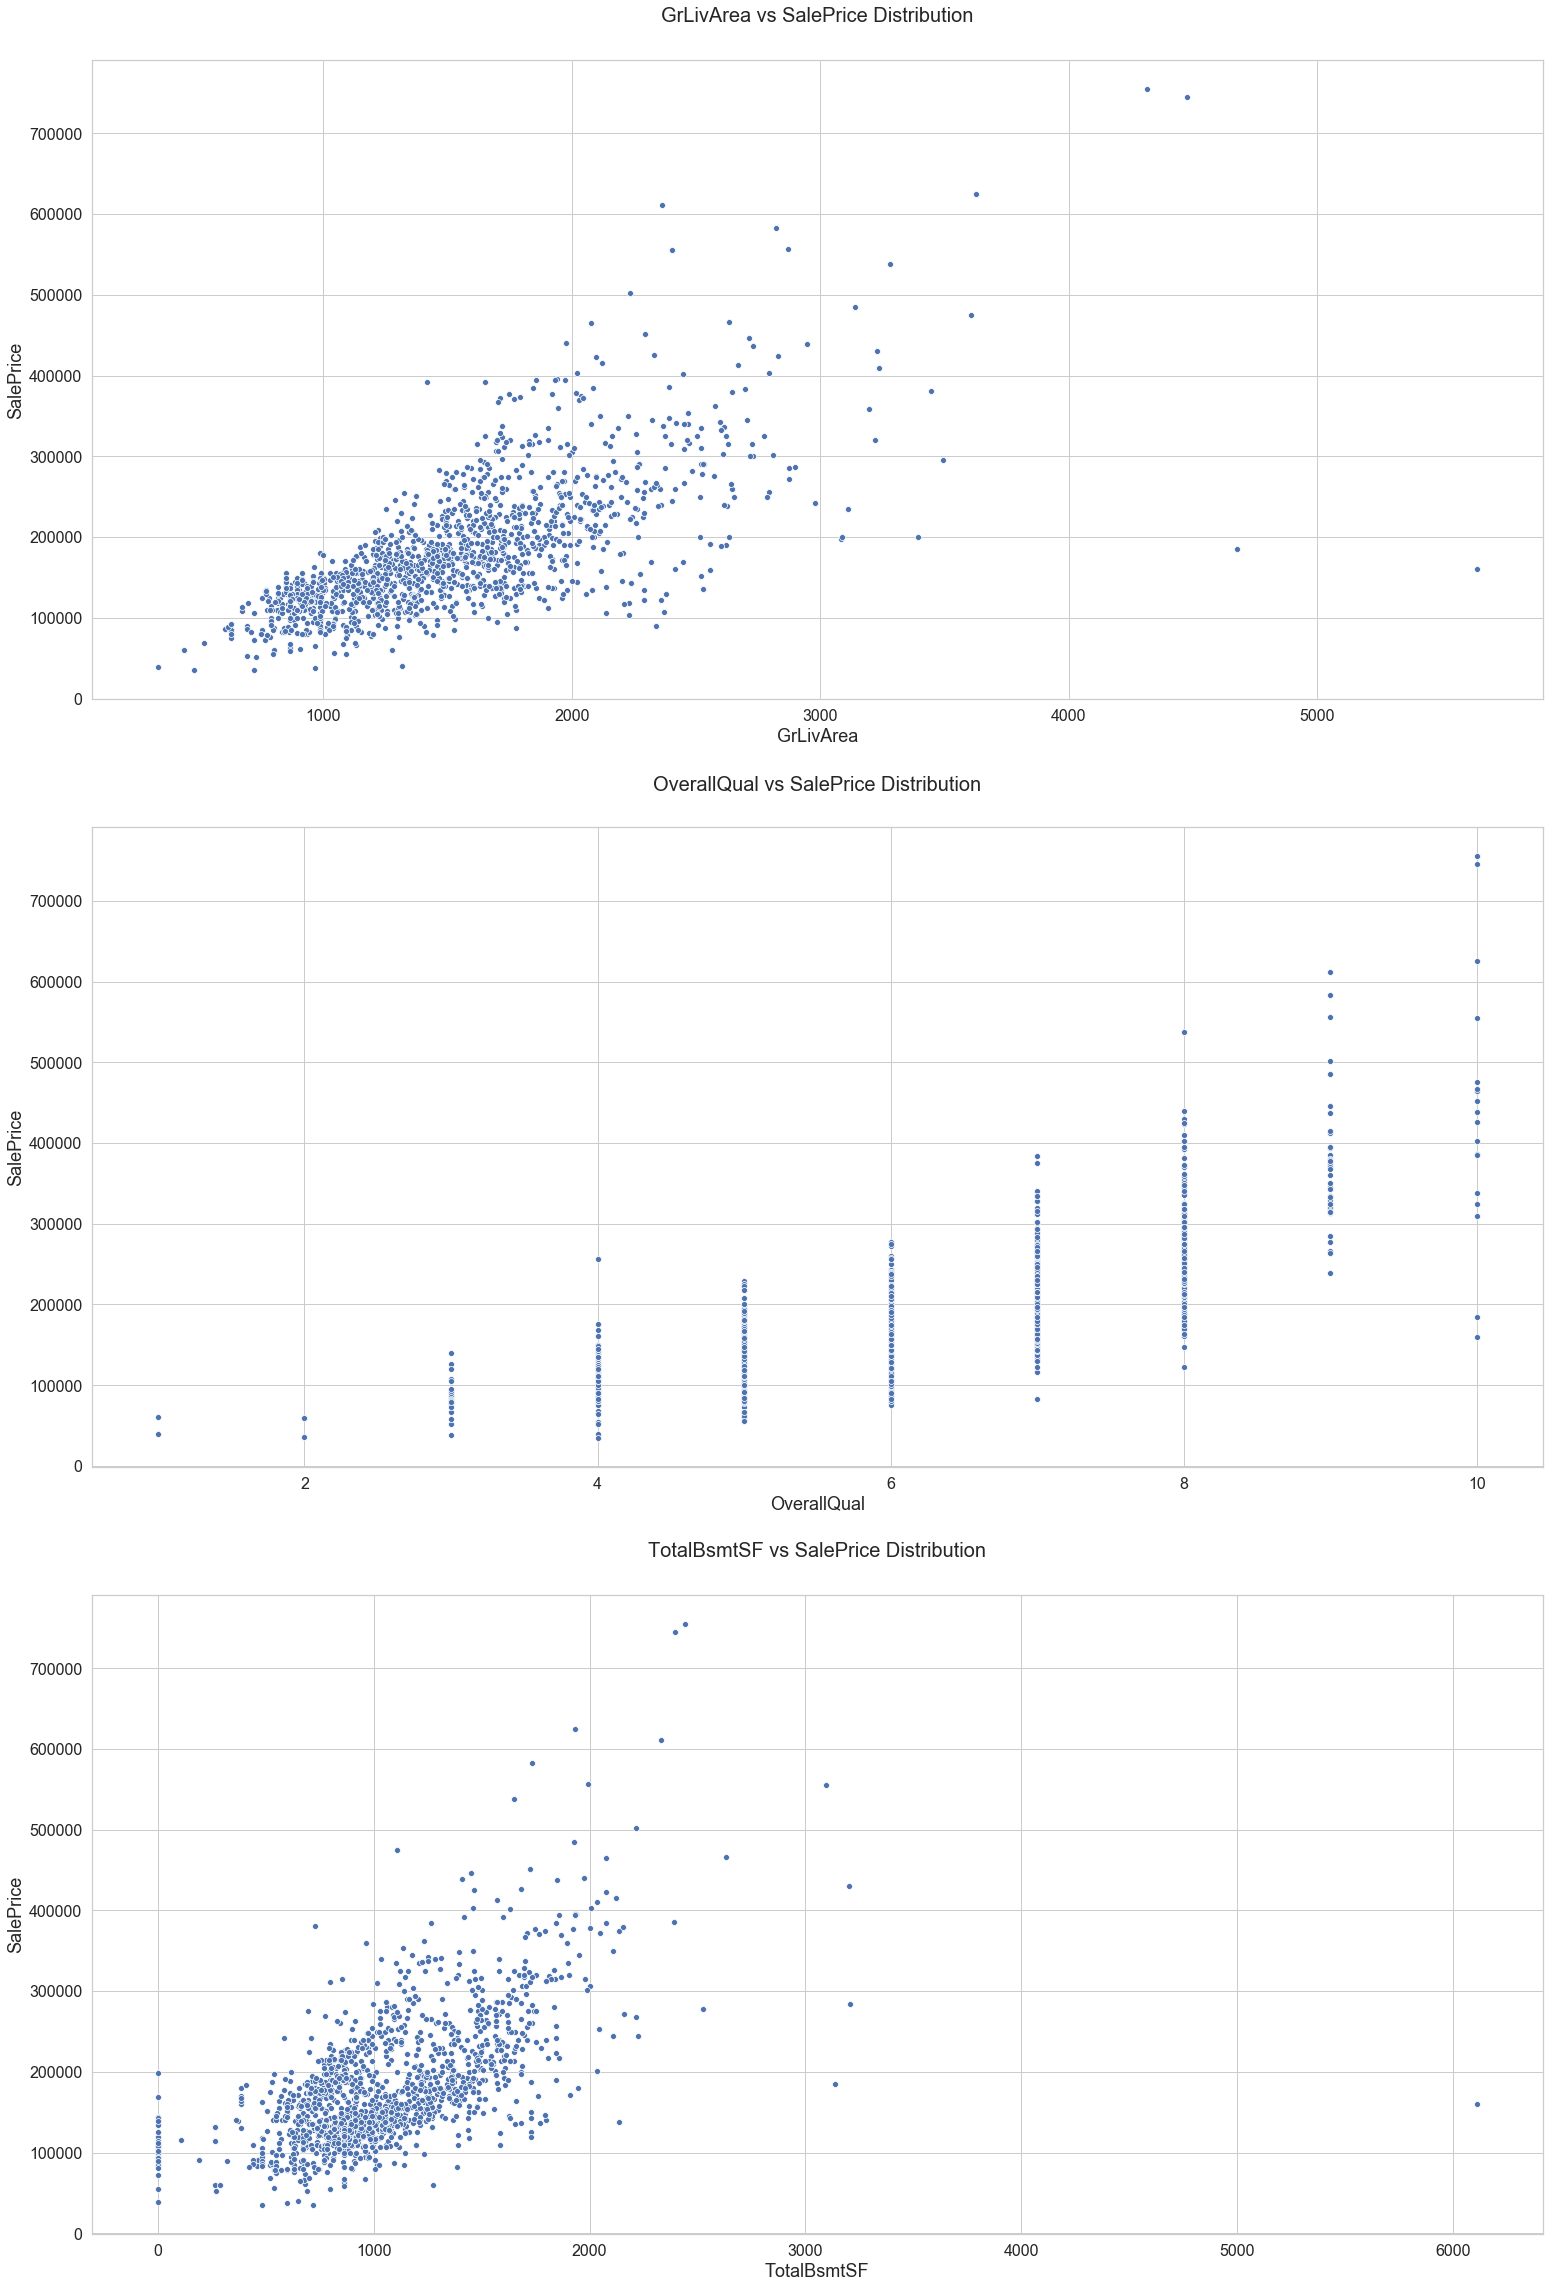

In [868]:
# Outlier Treatment:

# let's start with important features like GrLivArea, TotalBsmtSF OverallQual having strong correlation(>0.6) with the target variable
# SalePrice:

fig = plt.figure(figsize=(26, 40))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=house_df['GrLivArea'], y='SalePrice', palette='Blues_d', data=house_df)
plt.xlabel('GrLivArea', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('GrLivArea vs SalePrice Distribution', size=20, y=1.05)

plt.subplot(3,1,2)
sns.scatterplot(x=house_df['OverallQual'], y='SalePrice', palette='Blues_d', data=house_df)
plt.xlabel('OverallQual', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('OverallQual vs SalePrice Distribution', size=20, y=1.05)

plt.subplot(3,1,3)
sns.scatterplot(x=house_df['TotalBsmtSF'], y='SalePrice', palette='Blues_d', data=house_df)
plt.xlabel('TotalBsmtSF', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('TotalBsmtSF vs SalePrice Distribution', size=20, y=1.05)

plt.show()

In [869]:
house_df.shape

(1460, 77)

In [870]:
# From above distribution we can clearly identify that  for "GrLivArea": Above grade (ground) living area square feet, there
# are few outlier data-point as the sales-price is unusually lower for such a big area:

house_df.drop(house_df[np.logical_and(house_df['GrLivArea']>4000, house_df['SalePrice']<200000)].index, inplace=True)

# Similarly, for OverallQual feature few house have overall quality level 10 and are sold for very less price :
# And house price higher for less than 5 rating: 
house_df.drop(house_df[np.logical_and(house_df['OverallQual'] < 5, house_df['SalePrice'] > 200000)].index, inplace=True)
house_df.drop(house_df[np.logical_and(house_df['OverallQual']==10, house_df['SalePrice']<200000)].index, inplace=True)

# Similarly for TotalBsmtSF one of the data-point is having huge area with very less selling price, lets eliminate the same:
house_df.drop(house_df[np.logical_and(house_df['TotalBsmtSF']>6000, house_df['SalePrice']<200000)].index, inplace=True)


house_df = house_df.reset_index(drop = True)

In [871]:
house_df.shape

(1457, 77)

In [872]:
# So we have eliminated total 3 outliers datapoints from our housing data-set.

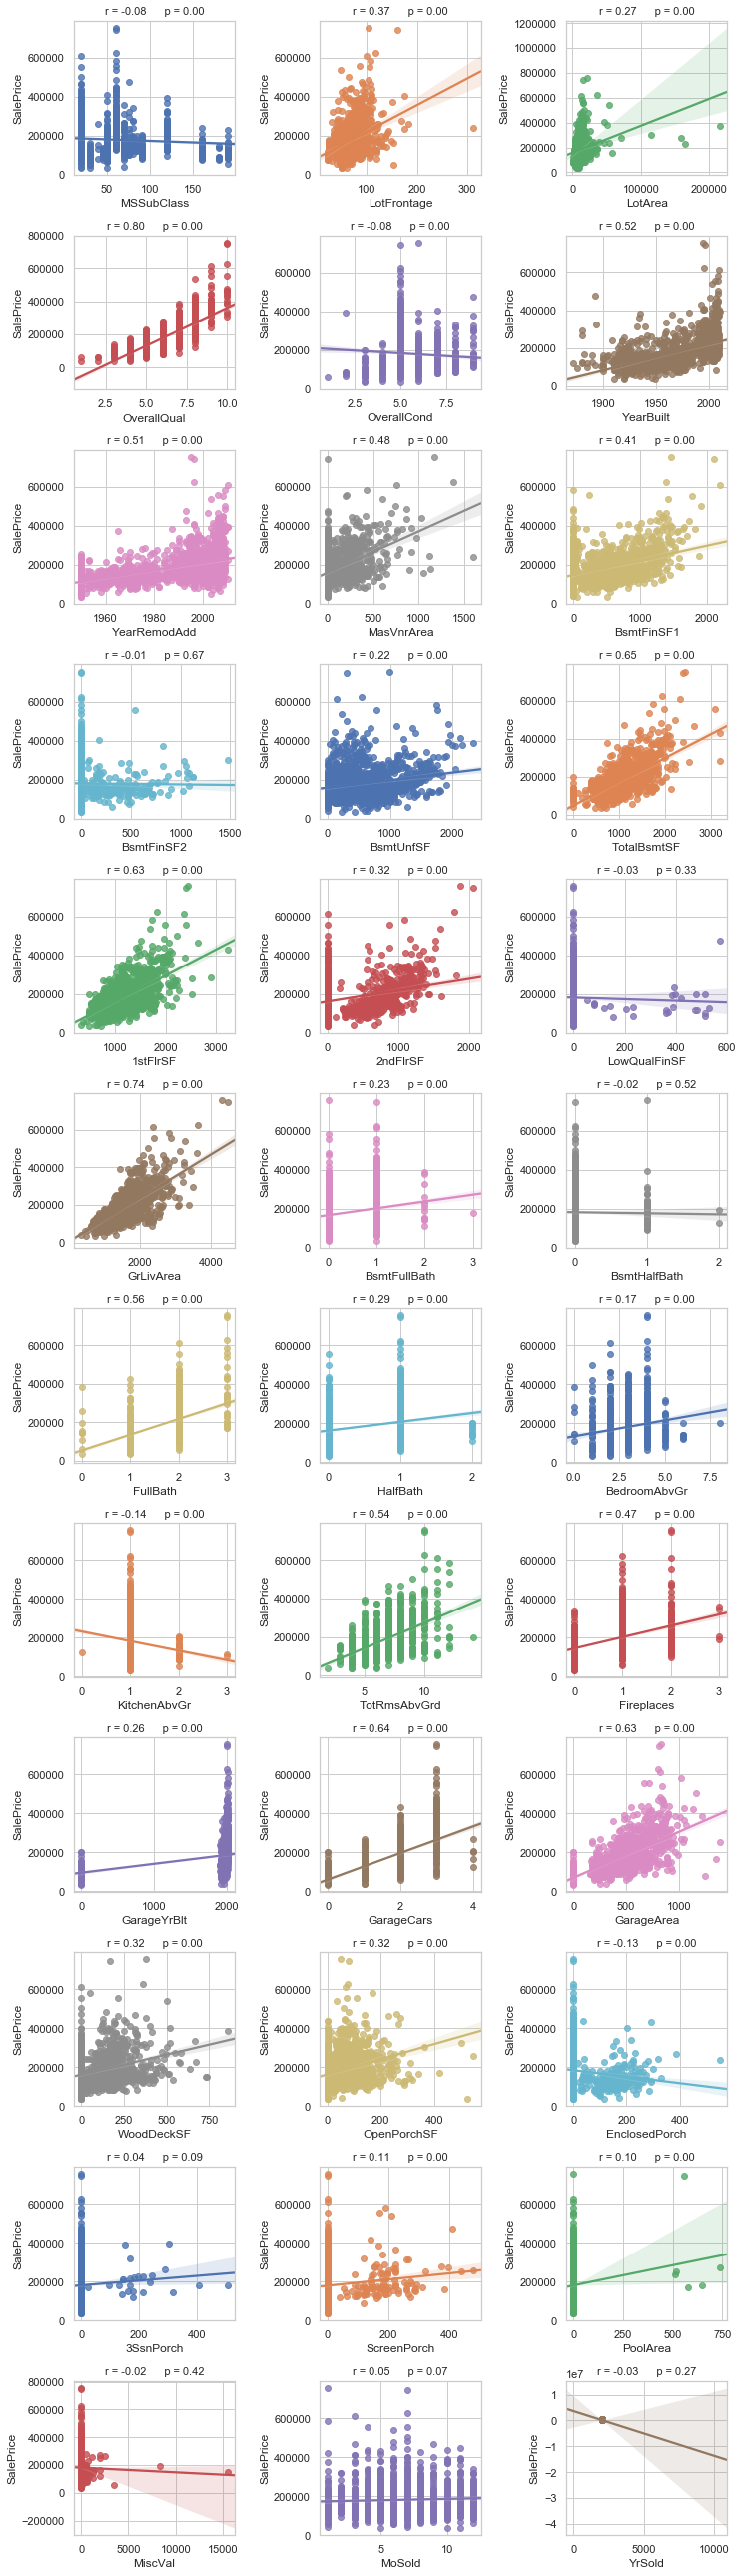

In [873]:
# Plots of relation to target for all numerical features:

nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(num_features)

# Skipping Id is as its just a number and SalesPrice itself is a target variable 
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Using pearson coefficient:
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(house_df[li_plot_num_feats[i]], house_df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(house_df[li_plot_num_feats[i]], house_df['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [874]:
# Inference:
# We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
# For other features like 'MSSubClass','MoSold' the correlation is very weak.

# For reference "r" in the plot represents the correlation and p is the p-value which is significance of the variable.

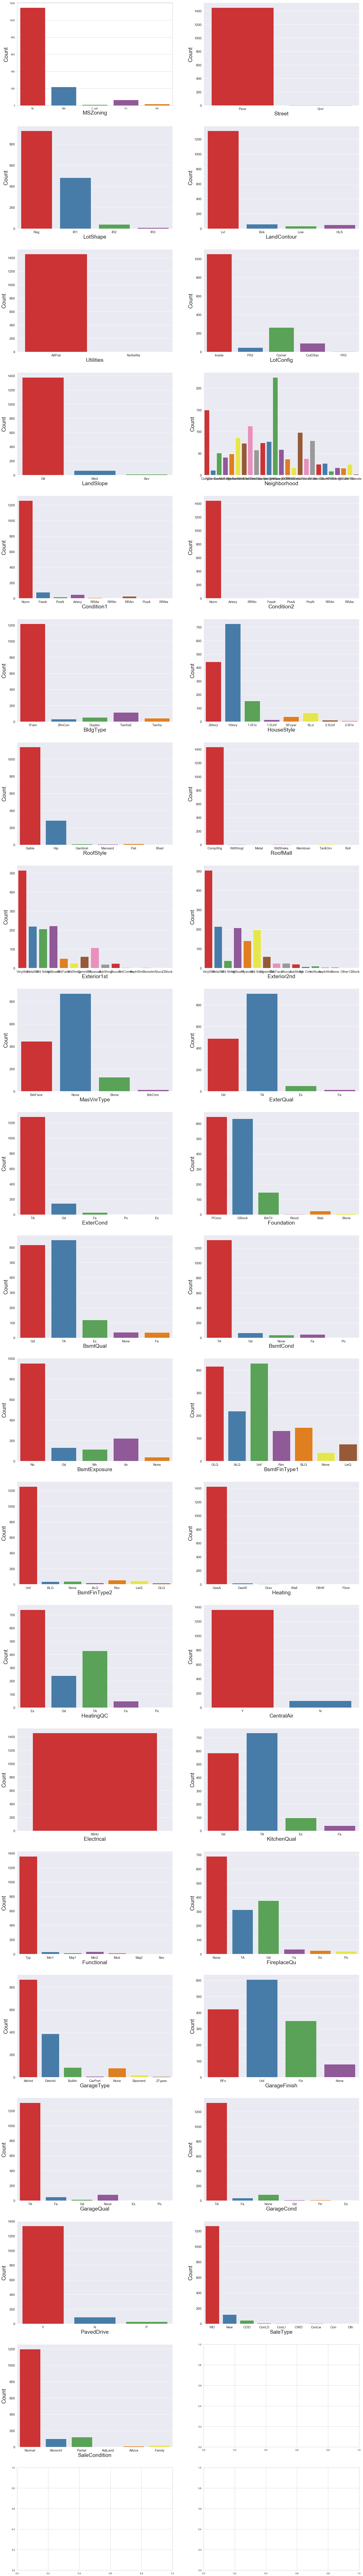

In [875]:
# Plot of the categorical features distribution:

housing_cat_var_list = house_df.select_dtypes(exclude=[np.number]).columns.tolist()

fig, axs = plt.subplots(ncols=2, nrows=21, figsize=(16, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(housing_cat_var_list, 1):    
    plt.subplot(21, 2, i)
    sns.set(font_scale = 1.4)
    sns.countplot(x=feature, data=house_df, palette='Set1')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('Count', size=26)
            
plt.show()


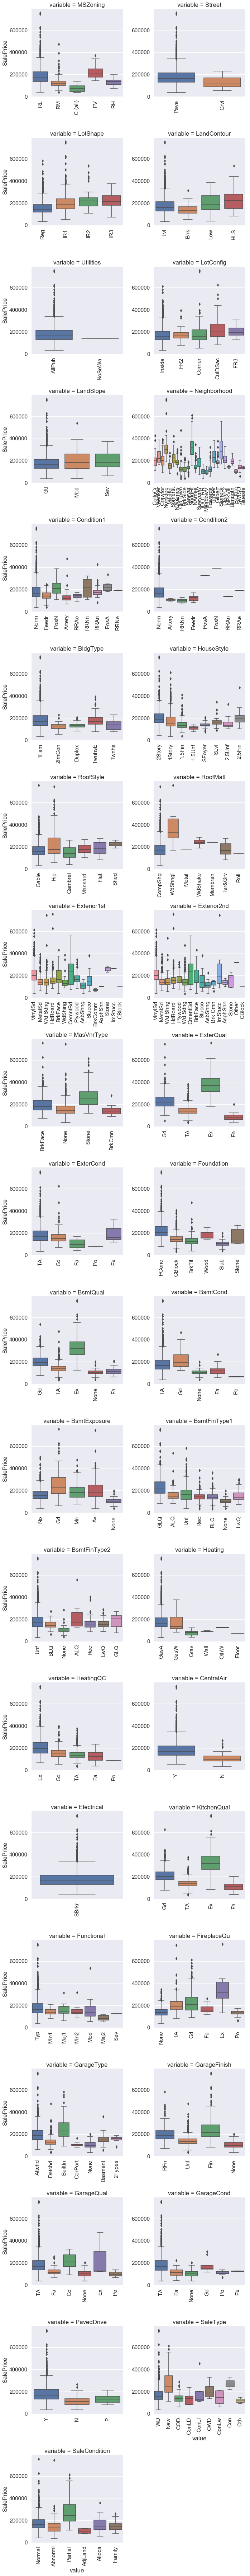

In [876]:
# Plot of relation between qualitative (categorical) variable and the target variable (SalePrice):

housing_cat_var = house_df.select_dtypes(exclude=[np.number]).columns

# Creating boxplot with the target variable:        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(house_df, id_vars=['SalePrice'], value_vars=housing_cat_var)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice", color = 'husl')



### Performing Feature Engineering:

In [877]:
# We will be performing some creative engineering to create new features from existing ones:

# Total Square Footage (TotalSF) : Total sum of area available with each house :
house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF'] + house_df['GarageArea'] + house_df['WoodDeckSF'] + house_df['OpenPorchSF']

# Total Living Area divided by LotArea:
house_df['PercentLivingtoLot'] = house_df['TotalSF'] / house_df['LotArea']
    
# Total Number of Bathrooms available with the house:
house_df['TotalBath'] = house_df['FullBath'] + (0.5 * house_df['HalfBath']) + house_df['BsmtFullBath'] + (0.5 * house_df['BsmtHalfBath'])   
    
# get current year 
current_year = datetime.datetime.now().year    

# Create new feature to identify time in years since last remodel(or construction) was done on house:
house_df['YearSinceLastRemodel'] = current_year - ((house_df['YearRemodAdd'] - house_df['YearBuilt']) + house_df['YearBuilt'])

# Age of house :
house_df['house_age'] = house_df['YrSold'] - house_df['YearBuilt']


# Creating new binary features to understand if the house has the desired facility available or not:
house_df['HasPool'] = house_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house_df['Has2ndFloor'] = house_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_df['HasGarage'] = house_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_df['HasBsmt'] = house_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_df['HasFireplace'] = house_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    

In [878]:
# Lets see if we need to change the datatype of any column:

# We can observe that few numerical features are actually categorical, lets change their datatypes:

# MSSubClass: Identifies the type of dwelling involved in the sale.
# OverallCond: Rates the overall condition of the house
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)
# YearBuilt: Original construction date


features_to_transform_to_string = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold','YearBuilt']

for feature in features_to_transform_to_string:
    house_df[feature] = house_df[feature].apply(str)

In [879]:
house_df.shape
# It has 1457 rows and 87 columns (features as of now)

(1457, 87)

In [880]:
# Dropping the id feature as its just a unique number assigned to each data-point and will not impact the prediction of 
# saleprice :

house_df.drop(columns=['Id',], inplace=True)

In [881]:
# lets see the numerical variables that we have in hand now:
housing_num_var = house_df.select_dtypes(include=[np.number]).columns
housing_num_var_df = house_df[housing_num_var]
housing_cat_var = house_df.select_dtypes(exclude=[np.number]).columns
housing_cat_var_df = house_df[housing_cat_var]
# housing_num_var_df.head()
housing_num_var

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'TotalSF', 'PercentLivingtoLot', 'TotalBath',
       'YearSinceLastRemodel', 'house_age', 'HasPool', 'Has2ndFloor',
       'HasGarage', 'HasBsmt', 'HasFireplace'],
      dtype='object')

In [882]:
# lets see the categorical variables that we have in hand now:

#housing_cat_var_df.head()
housing_cat_var

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

### Understanding numerical variables and performing transformations if needed:

In [883]:
# We will focus on the variables having stronger correlation with the target variable first and higher significance:

# Also, many statistical analyses require an assumption of normality, such as analysis of variance(ANOVA) test.So
# transformations are used to make data approximately normal. We will be using the transfromation for our use case.
# We will use transformation mechanism if needed later like BoxCox or Log Transformation

In [884]:
# Understanding the target variable "Sales Price":

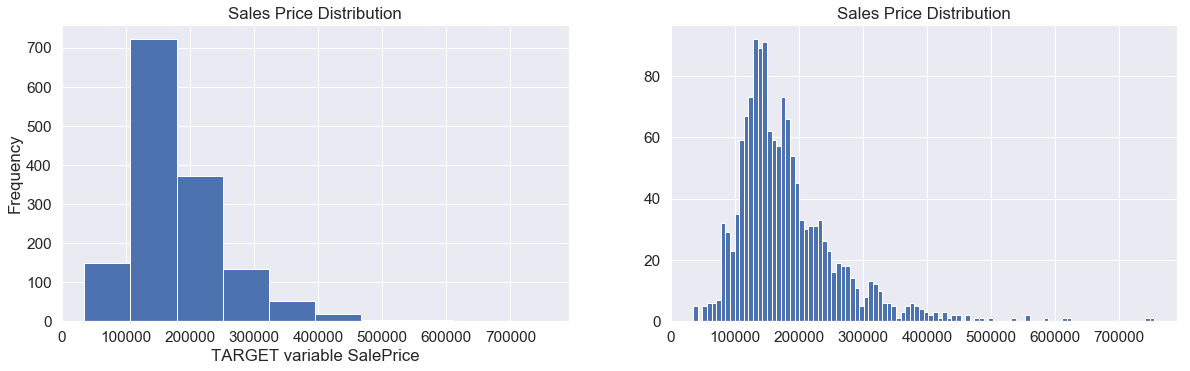

In [885]:

# Plotting the information for visualisation wrt to target variable in absolute terms:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
plt.title('Sales Price Distribution')
house_df['SalePrice'].astype(int).plot.hist();
plt.xlabel("TARGET variable SalePrice")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Sales Price Distribution')
sns.set()
plt.hist(house_df['SalePrice'],bins=100)
plt.show()

In [886]:
# As per the data that we have in hand for the target variable, sale price is nearly normallly distributed with mean close to
# 18000 i.e. most of the house have the price around the mean.

# We also observe that the data given is positively skewed and having positive kurtosis as well.
print("Skewness of target variable wihout transformation: %f" % house_df['SalePrice'].skew())
print("Kurtosis of target variable wihout transformation: %f" % house_df['SalePrice'].kurt())

# The value closer to 0 for the skewness and kurtosis is better 

Skewness of target variable wihout transformation: 1.883749
Kurtosis of target variable wihout transformation: 6.532570


In [887]:
# The target variable needs transformation to remove skewness.

Skewness of transformed target variable: 0.123045
Kurtosis of transformed target variable: 0.807618


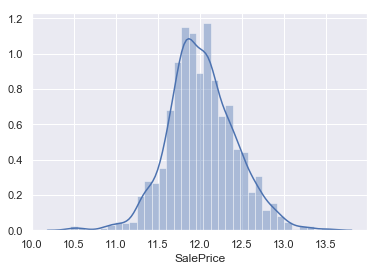

In [888]:
# Performing log transformation 
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# re-checkig the variable after transformation:
sns.distplot(house_df['SalePrice'], hist=True)

print("Skewness of transformed target variable: %f" % house_df['SalePrice'].skew())
print("Kurtosis of transformed target variable: %f" % house_df['SalePrice'].kurt())

In [889]:
# So the target variable "SalePrice" skewness is removed now after transformation and it is nearly normally distributed now.
# The skewed and long tailed distribution of the SalePrice is solved by applying log(1 + x) transformation. 
# This transformation reduced skewness from 1.88 to 0.12 and reduced kurtosis from 6.53 to 0.80.

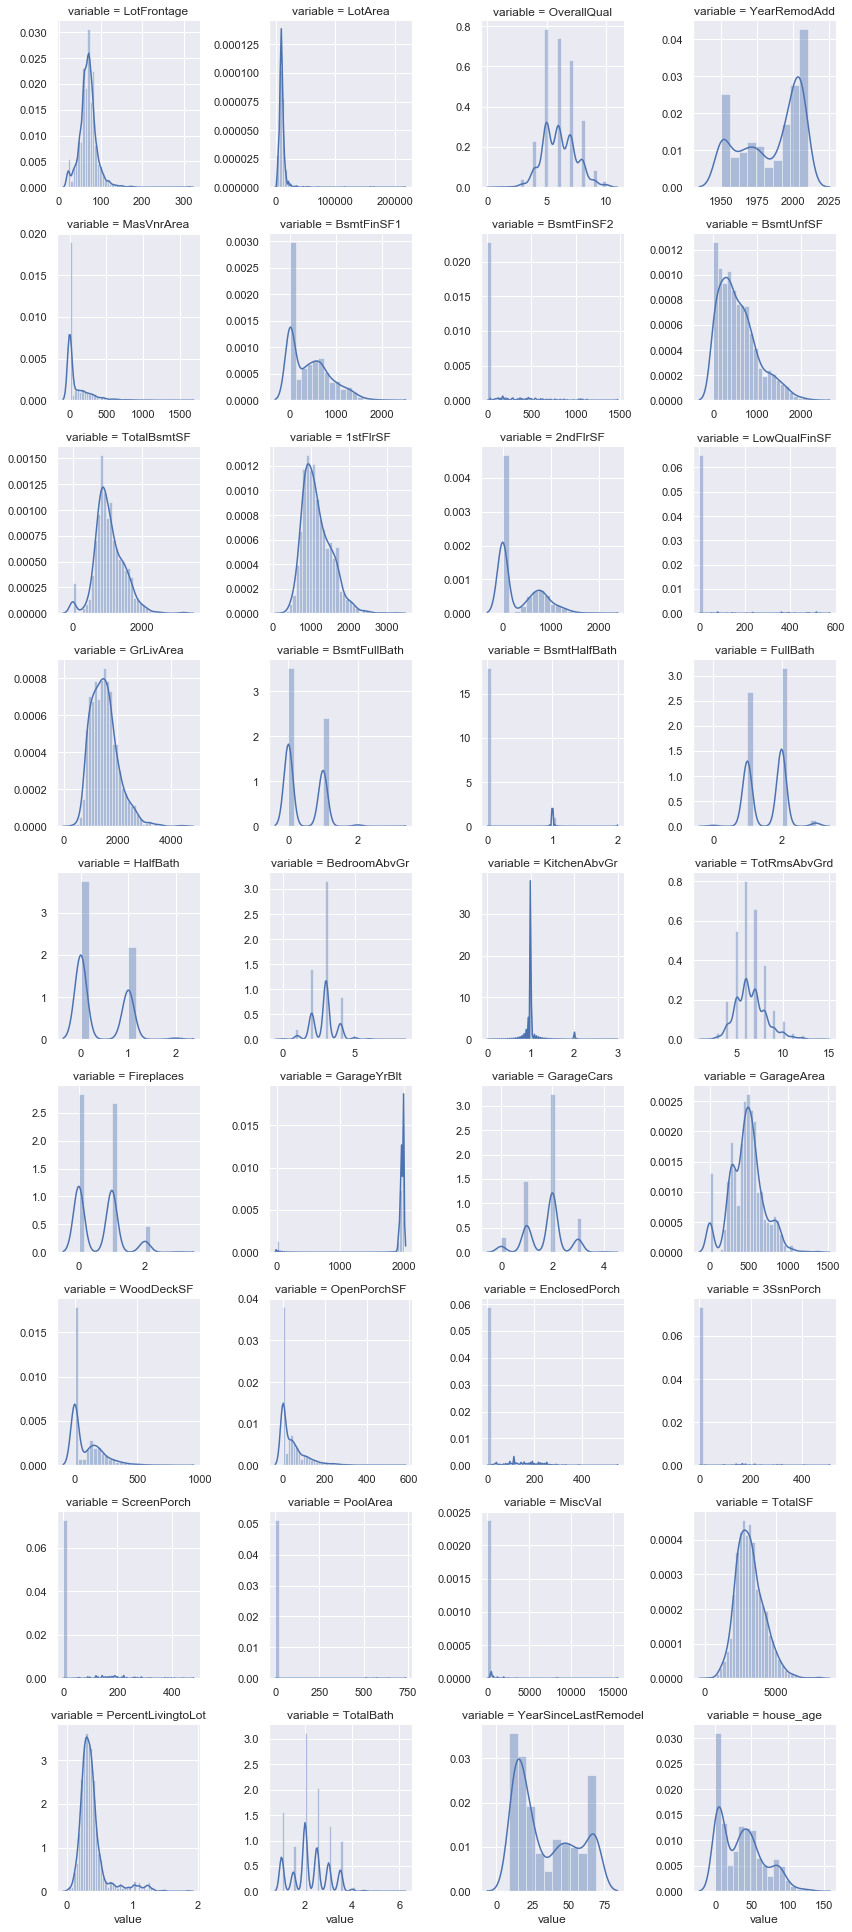

In [890]:
# Lets have a look at the feature variable distribution to understand if we need to perform variable transformation is needed
# for them or not:

# Selecting only numerical feature from the dataframe:
numeric_features = house_df.select_dtypes(include=[np.number]).columns.tolist()

# Exclusing few binary features, target features as already transformed and Id as its just for numering:
li_not_plot = ['Id', 'SalePrice','HasPool','Has2ndFloor','HasGarage','HasBsmt','HasFireplace']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

# Plotting the distribution of the quantative variables:
f = pd.melt(house_df, value_vars=li_transform_num_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


In [891]:
# As we can see that most of the variables does not follow normal distribution and are skewed, so we need to apply 
# transformation to them.

# Let's find out the numerical feature variables variables which needs to be transformed by considering cut-off as 0.5:

# Identifying high skewed features:
high_skewed_features = house_df[li_transform_num_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

# Defining cut-off of 0.5 for skewness:
norm_target_features = high_skewed_features[high_skewed_features > 0.5]
norm_target_index = norm_target_features.index

print("{} numerical features needs transformation in the dataset :".format(norm_target_features.shape[0]))
skewness = pd.DataFrame({'Skew' :norm_target_features})
norm_target_features

28 numerical features needs transformation in the dataset :


MiscVal                 24.426546
PoolArea                15.927003
LotArea                 12.755946
3SsnPorch               10.282886
LowQualFinSF             8.992490
KitchenAbvGr             4.478508
BsmtFinSF2               4.245879
ScreenPorch              4.113045
BsmtHalfBath             4.094248
EnclosedPorch            3.082631
MasVnrArea               2.692486
PercentLivingtoLot       2.507364
OpenPorchSF              2.342293
LotFrontage              1.546880
WoodDeckSF               1.546764
GrLivArea                1.010299
BsmtUnfSF                0.918905
1stFlrSF                 0.889179
2ndFlrSF                 0.811079
BsmtFinSF1               0.766260
TotalSF                  0.691109
HalfBath                 0.678259
TotRmsAbvGrd             0.659034
Fireplaces               0.631727
house_age                0.608321
BsmtFullBath             0.591647
TotalBsmtSF              0.512553
YearSinceLastRemodel     0.500397
dtype: float64

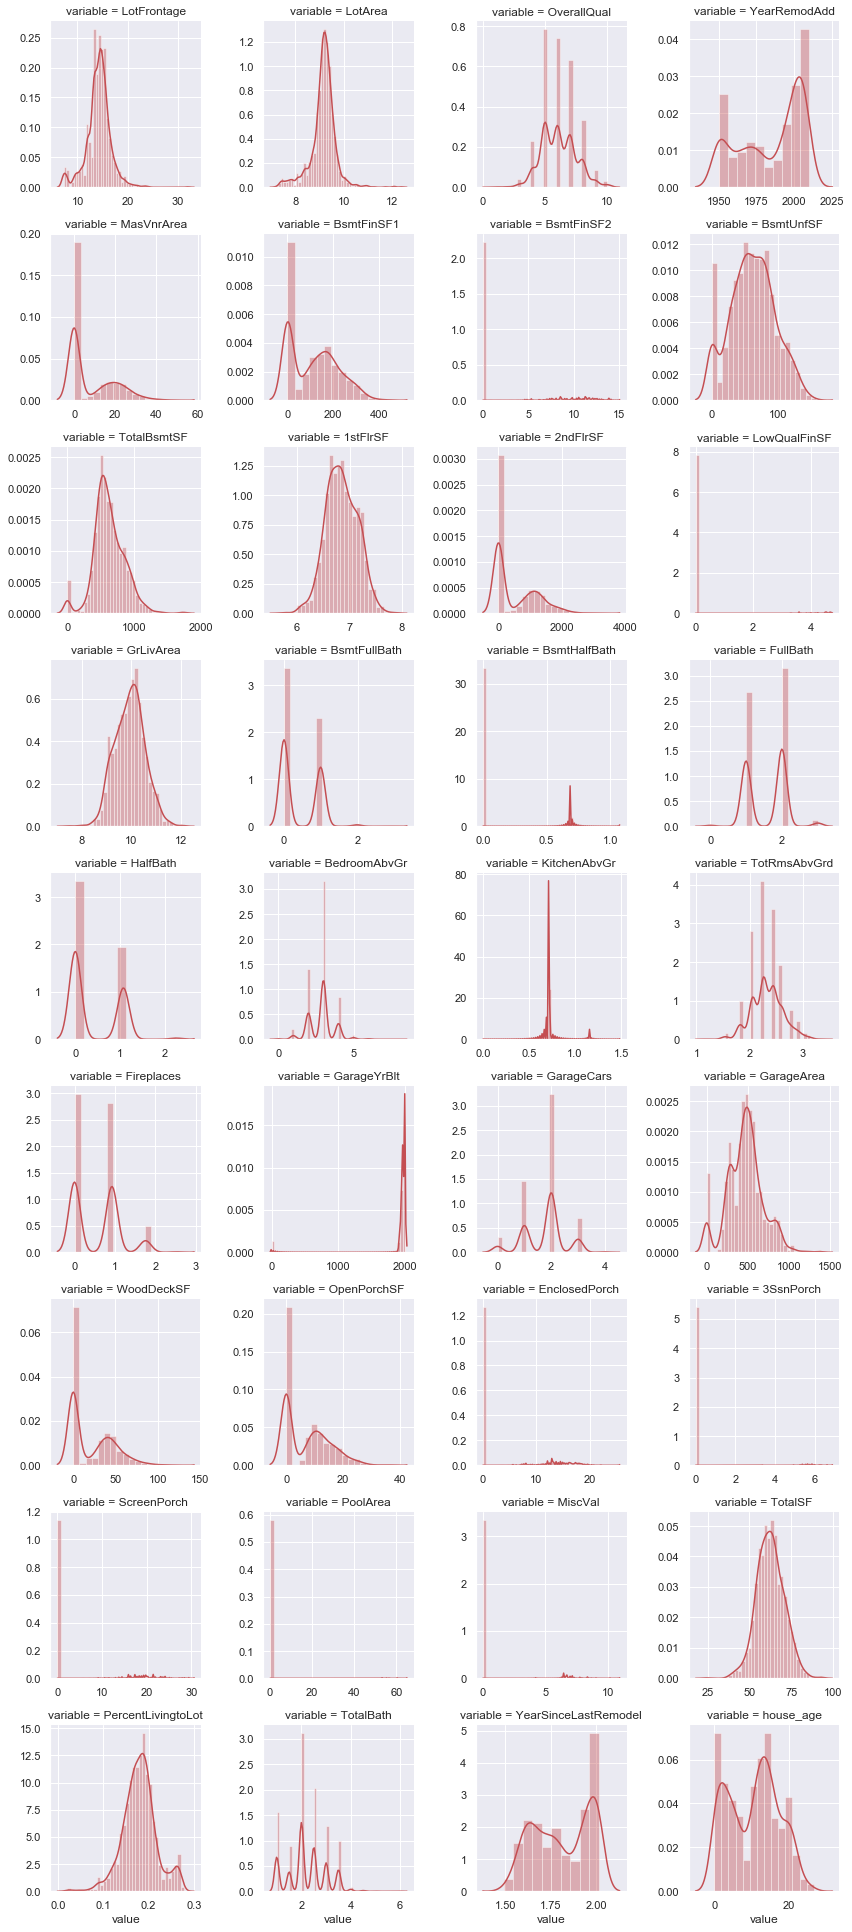

In [892]:
# We will be using the boxcox transformation for the numeric features which needs normalization as they work good with both
# positive and negative values of the numerical variable:

# Normalizing with Box Cox Transformation:
for i in norm_target_index:
    house_df[i] = boxcox1p(house_df[i], boxcox_normmax(house_df[i] + 1))
    
# Lets re-check the skewness after the transformation through the plot:
f = pd.melt(house_df, value_vars=li_transform_num_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="r")

In [893]:
# So the skewness is removed upto much extent now and data is more of normalised now for these features.

In [894]:
# Let's re-check the data-frame that we have:
house_df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0         60       RL    13.819935  9.091255   Pave      Reg         Lvl   
1         20       RL    15.490967  9.220239   Pave      Reg         Lvl   
2         60       RL    14.168559  9.380598   Pave      IR1         Lvl   
3         70       RL    13.220390  9.214960   Pave      IR1         Lvl   
4         60       RL    15.909206  9.620371   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual OverallCond YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7           5      2003          2003     Gable   
1     1Story            6           8      1976          1976     Gable   
2     2Story            7           5      2001          2002     Gable   
3     2Story            7           5      1915          1970     Gable   
4     2Story            8           5      2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   19.455306        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   17.788196        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None    0.000000        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   25.437010        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ  189.374823   
1     CBlock       Gd       TA           Gd          ALQ  242.742427   
2      PConc       Gd       TA           Mn          GLQ  142.432753   
3     BrkTil       TA       Gd           No          ALQ   76.570648   
4      PConc       Gd       TA           Av          GLQ  178.853171   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0  30.309818   521.101046    GasA        Ex   
1          Unf         0.0  44.679287   743.015004    GasA        Ex   
2          Unf         0.0  57.663327   556.600844    GasA        Ex   
3          Unf         0.0  65.721328   465.162482    GasA        Gd   
4          Unf         0.0  62.011144   679.804428    GasA        Ex   

  CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.607447  1290.689134           0.0  10.253330   
1          Y      SBrkr  6.978143     0.000000           0.0   9.701856   
2          Y      SBrkr  6.676362  1310.119602           0.0  10.333403   
3          Y      SBrkr  6.718022  1132.758571           0.0  10.260840   
4          Y      SBrkr  6.885308  1615.249822           0.0  10.719597   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      0.994137      0.000000         2   1.07115             3      0.717368   
1      0.000000      0.682746         2   0.00000             3      0.717368   
2      0.994137      0.000000         2   1.07115             3      0.717368   
3      0.994137      0.000000         1   0.00000             3      0.717368   
4      0.994137      0.000000         2   1.07115             4      0.717368   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd      2.601966        Typ    0.000000        None     Attchd   
1          TA      2.259193        Typ    0.925372          TA     Attchd   
2          Gd      2.259193        Typ    0.925372          TA     Attchd   
3          Gd      2

In [895]:
# Creating copy of the house pricing data-frame for performing the multiple linear regressions, lasso and ridge:

housing_price_mlr_df = house_df
housing_price_ridge_df = house_df
housing_price_lasso_df = house_df

## Step2 : Model Building :

### We will be building 3 models for our assignment for same data to compare the performance:
1. Multiple Linear Regression model using RFE.
2. Linear Regression model using Ridge.
3. Linear Regression model using Lasso.



### 2. 1  : Multiple Linear Regression model using RFE:

In [896]:
# So we have the required data in the below dataframe:
housing_price_mlr_df.shape


(1457, 86)

In [897]:
# Checking the data in the data frame for the LR:
housing_price_mlr_df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0         60       RL    13.819935  9.091255   Pave      Reg         Lvl   
1         20       RL    15.490967  9.220239   Pave      Reg         Lvl   
2         60       RL    14.168559  9.380598   Pave      IR1         Lvl   
3         70       RL    13.220390  9.214960   Pave      IR1         Lvl   
4         60       RL    15.909206  9.620371   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual OverallCond YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7           5      2003          2003     Gable   
1     1Story            6           8      1976          1976     Gable   
2     2Story            7           5      2001          2002     Gable   
3     2Story            7           5      1915          1970     Gable   
4     2Story            8           5      2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   19.455306        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   17.788196        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None    0.000000        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   25.437010        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ  189.374823   
1     CBlock       Gd       TA           Gd          ALQ  242.742427   
2      PConc       Gd       TA           Mn          GLQ  142.432753   
3     BrkTil       TA       Gd           No          ALQ   76.570648   
4      PConc       Gd       TA           Av          GLQ  178.853171   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0  30.309818   521.101046    GasA        Ex   
1          Unf         0.0  44.679287   743.015004    GasA        Ex   
2          Unf         0.0  57.663327   556.600844    GasA        Ex   
3          Unf         0.0  65.721328   465.162482    GasA        Gd   
4          Unf         0.0  62.011144   679.804428    GasA        Ex   

  CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.607447  1290.689134           0.0  10.253330   
1          Y      SBrkr  6.978143     0.000000           0.0   9.701856   
2          Y      SBrkr  6.676362  1310.119602           0.0  10.333403   
3          Y      SBrkr  6.718022  1132.758571           0.0  10.260840   
4          Y      SBrkr  6.885308  1615.249822           0.0  10.719597   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      0.994137      0.000000         2   1.07115             3      0.717368   
1      0.000000      0.682746         2   0.00000             3      0.717368   
2      0.994137      0.000000         2   1.07115             3      0.717368   
3      0.994137      0.000000         1   0.00000             3      0.717368   
4      0.994137      0.000000         2   1.07115             4      0.717368   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd      2.601966        Typ    0.000000        None     Attchd   
1          TA      2.259193        Typ    0.925372          TA     Attchd   
2          Gd      2.259193        Typ    0.925372          TA     Attchd   
3          Gd      2

In [898]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = housing_price_mlr_df.select_dtypes(include=['object'])
house_categorical.head()


MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallCond YearBuilt RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           5      2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           8      1976     Gable  CompShg     MetalSd     MetalSd       None   
2           5      2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           5      1915     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           5      2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
1          Unf    GasA        Ex          Y      SBrkr          TA        Typ   
2          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
3          Unf    GasA        Gd          Y      SBrkr          Gd        Typ   
4          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive MoSold  \
0        None     Attchd          RFn         TA         TA          Y      2   
1          TA     Attchd          RFn         TA         TA          Y      5   
2          TA     Attchd          RFn         TA         TA          Y      9   
3          Gd     Detchd          Unf         TA         TA          Y      2   
4          TA     Attchd          RFn         TA         TA          Y     12   

  YrSold SaleType SaleCondition  
0   2008       WD        Normal  
1   2007       WD        Normal  
2   2008       WD        Normal  
3   2006       WD       Abnorml  
4   2008       WD        Normal

In [899]:
# convert into dummies:

house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edward

In [900]:
# drop categorical variables 
housing_price_mlr_df = housing_price_mlr_df.drop(list(house_categorical.columns), axis=1)

In [901]:
# concat dummy variables with X
housing_price_mlr_df = pd.concat([housing_price_mlr_df, house_dummies], axis=1)

In [902]:
# Examining the encoded dataframes(dataset) data:

housing_price_mlr_df.head()

LotFrontage   LotArea  OverallQual  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0    13.819935  9.091255            7          2003   19.455306  189.374823   
1    15.490967  9.220239            6          1976    0.000000  242.742427   
2    14.168559  9.380598            7          2002   17.788196  142.432753   
3    13.220390  9.214960            7          1970    0.000000   76.570648   
4    15.909206  9.620371            8          2000   25.437010  178.853171   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF     2ndFlrSF  LowQualFinSF  \
0         0.0  30.309818   521.101046  6.607447  1290.689134           0.0   
1         0.0  44.679287   743.015004  6.978143     0.000000           0.0   
2         0.0  57.663327   556.600844  6.676362  1310.119602           0.0   
3         0.0  65.721328   465.162482  6.718022  1132.758571           0.0   
4         0.0  62.011144   679.804428  6.885308  1615.249822           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0  10.253330      0.994137      0.000000         2   1.07115             3   
1   9.701856      0.000000      0.682746         2   0.00000             3   
2  10.333403      0.994137      0.000000         2   1.07115             3   
3  10.260840      0.994137      0.000000         1   0.00000             3   
4  10.719597      0.994137      0.000000         2   1.07115             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0      0.717368      2.601966    0.000000       2003.0           2   
1      0.717368      2.259193    0.925372       1976.0           2   
2      0.717368      2.259193    0.925372       2001.0           2   
3      0.717368      2.439712    0.925372       1998.0           3   
4      0.717368      2.749552    0.925372       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548    0.000000    12.189693       0.000000        0.0          0.0   
1         460   61.718150     0.000000       0.000000        0.0          0.0   
2         608    0.000000     9.981247       0.000000        0.0          0.0   
3         642    0.000000     9.034627      19.069318        0.0          0.0   
4         836   45.999727    14.412875       0.000000        0.0          0.0   

   PoolArea  MiscVal  SalePrice    TotalSF  PercentLivingtoLot  TotalBath  \
0       0.0      0.0  12.247699  63.339837            0.192102        3.5   
1       0.0      0.0  12.109016  64.235360            0.183581        2.5   
2       0.0      0.0  12.317171  64.844629            0.171089        3.5   
3       0.0      0.0  11.849405  63.128038            0.180314        2.0   
4       0.0      0.0  12.429220  73.087981            0.175338        3.5   

   YearSinceLastRemodel  house_age  HasPool  Has2ndFloor  HasGarage  HasBsmt  \
0              1.677626   3.101008        0            1          1        1   
1              1.924925  10.772259        0            0          1        1   
2              1.695360   3.960719        0            1          1        1   
3              1.951422  21.007724        0            1          1        1   
4              1.726981   4.355060        0            1          1        1   

   HasFireplace  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0             0               0               0               0   
1             1               0               0               0   
2             1               0               0               0   
3             1               0               0               0   
4             1               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              

In [903]:
# Since all the variables are now numerical, we can proceed with Splitting the first step in ML:

# Splitting the Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively:
#np.random.seed(0)
df_house_train, df_house_test = train_test_split(housing_price_mlr_df, train_size = 0.7, test_size = 0.3, random_state = 42)



In [904]:
# Examining the training dataframes(dataset) data and info:
df_house_train.shape

(1019, 395)

In [905]:
# Examining the test dataframes(dataset) data and info:
df_house_test.shape

(438, 395)

In [906]:
# Scaling the test data and training data using the standard scalar:
# Apply scaler() to all the columns except the 'dummy' variables, 'yes-no' and unordered categorical columns:

# Instantiate the scaler:
scaler = StandardScaler()

# apply scaler() to all the numeric columns:
num_vars = [ 'LotFrontage','LotArea','OverallQual','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
              'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','TotalSF','PercentLivingtoLot',
              'TotalBath','YearSinceLastRemodel','house_age']

df_house_train[num_vars] = scaler.fit_transform(df_house_train[num_vars])
df_house_test[num_vars] = scaler.transform(df_house_test[num_vars]) 


df_house_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=395)

In [907]:
# Dividing data into X and y variables for model building:

y_train = df_house_train.pop('SalePrice')
X_train = df_house_train

In [908]:
# Using Recursive Feature Elimination (RFE) of scikilt learn library to perform automated course feature selection:

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE and taking top 20 feature for our model building:
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [909]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 297),
 ('LotArea', False, 144),
 ('OverallQual', False, 9),
 ('YearRemodAdd', False, 248),
 ('MasVnrArea', False, 360),
 ('BsmtFinSF1', False, 164),
 ('BsmtFinSF2', False, 339),
 ('BsmtUnfSF', False, 311),
 ('TotalBsmtSF', False, 310),
 ('1stFlrSF', False, 65),
 ('2ndFlrSF', False, 64),
 ('LowQualFinSF', False, 359),
 ('GrLivArea', False, 255),
 ('BsmtFullBath', False, 81),
 ('BsmtHalfBath', False, 82),
 ('FullBath', False, 79),
 ('HalfBath', False, 80),
 ('BedroomAbvGr', False, 332),
 ('KitchenAbvGr', False, 334),
 ('TotRmsAbvGrd', False, 331),
 ('Fireplaces', False, 275),
 ('GarageYrBlt', False, 362),
 ('GarageCars', False, 276),
 ('GarageArea', False, 294),
 ('WoodDeckSF', False, 365),
 ('OpenPorchSF', False, 358),
 ('EnclosedPorch', False, 353),
 ('3SsnPorch', False, 336),
 ('ScreenPorch', False, 304),
 ('PoolArea', False, 14),
 ('MiscVal', False, 364),
 ('TotalSF', True, 1),
 ('PercentLivingtoLot', False, 185),
 ('TotalBath', False, 73),
 ('YearSinceLastRem

In [910]:
# Columns significant according to RFC:
col = X_train.columns[rfe.support_]
col

Index(['TotalSF', 'MSSubClass_90', 'Condition2_Feedr', 'Condition2_RRAn',
       'OverallCond_3', 'OverallCond_4', 'YearBuilt_1880', 'YearBuilt_1890',
       'YearBuilt_1892', 'YearBuilt_1900', 'ExterCond_Po', 'BsmtFinType1_None',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [911]:
# Building model using statsmodel, for the detailed statistics:

# Creating X_test dataframe with RFE selected variables:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

TotalSF  MSSubClass_90  Condition2_Feedr  Condition2_RRAn  \
471  -1.054841              0                 0                0   
1029  1.170769              0                 0                0   
435   0.124717              0                 0                0   
1260  0.210846              0                 0                0   
1007 -1.256019              0                 0                0   

      OverallCond_3  OverallCond_4  YearBuilt_1880  YearBuilt_1890  \
471               0              0               0               0   
1029              1              0               0               0   
435               0              0               0               0   
1260              0              0               0               0   
1007              0              0               0               0   

      YearBuilt_1892  YearBuilt_1900  ExterCond_Po  BsmtFinType1_None  \
471                0               0             0                  0   
1029               0               0             0                  0   
435                0               0             0                  0   
1260               0               0             0                  0   
1007               0               0             0                  0   

      GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  \
471               0              0              0              1   
1029              0              0              0              1   
435               0              0              0              1   
1260              0              0              0              1   
1007              0              0              0              0   

      GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA  
471               0              0              0              1  
1029              0              0              0              1  
435               0              0              0              1  
1260              0              0              0              1  
1007              0              0              0              0

In [912]:
# Model1:

#Build a linear model for all the columns 

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

#X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:46   Log-Likelihood:                 356.92
No. Observations:                1019   AIC:                            -671.8
Df Residuals:                     998   BIC:                            -568.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0672      0.02

In [913]:
# Checking VIF of model1:

#Calculating the Variance Inflation Factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features      VIF
19      GarageCond_TA  1875.56
15      GarageQual_TA  1853.41
12      GarageQual_Fa    66.44
16      GarageCond_Fa    51.98
13      GarageQual_Gd    25.56
17      GarageCond_Gd    15.43
18      GarageCond_Po     8.01
14      GarageQual_Po     3.67
8      YearBuilt_1892     2.06
11  BsmtFinType1_None     1.32
6      YearBuilt_1880     1.24
1       MSSubClass_90     1.21
0             TotalSF     1.19
5       OverallCond_4     1.10
4       OverallCond_3     1.06
9      YearBuilt_1900     1.04
3     Condition2_RRAn     1.03
7      YearBuilt_1890     1.00
2    Condition2_Feedr     1.00
10       ExterCond_Po     1.00

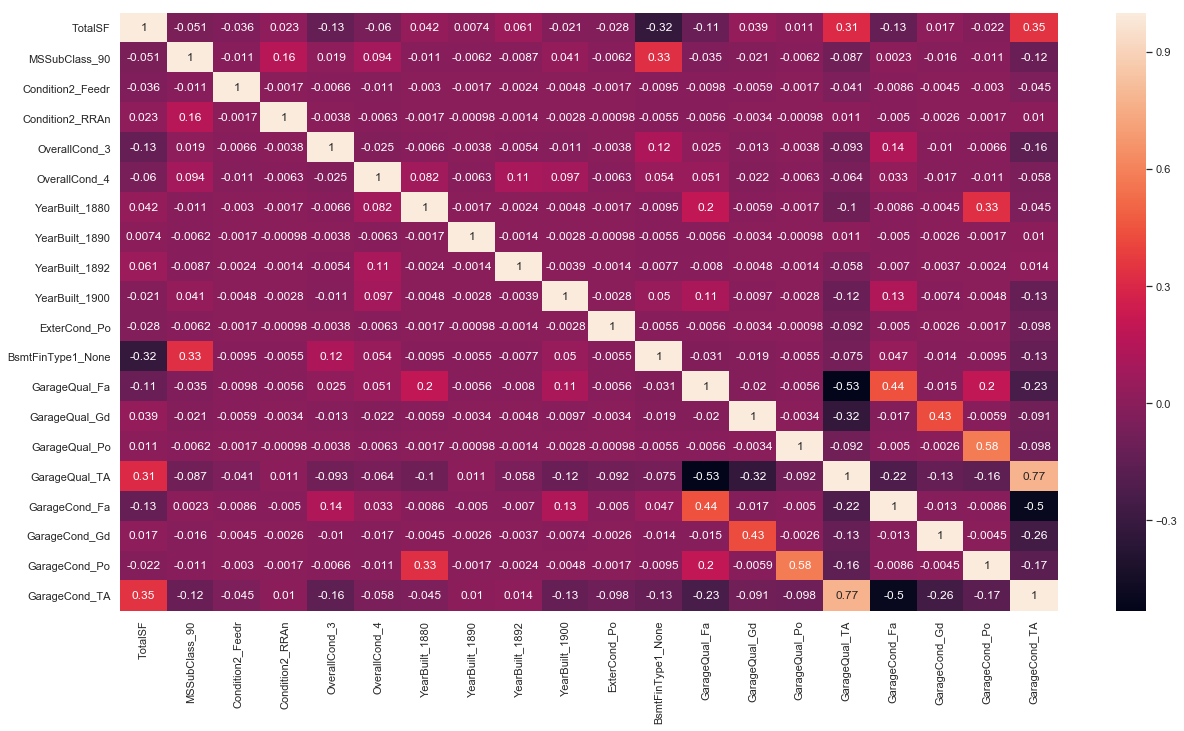

In [914]:
# Corelation Matrix of Model 1:

plt.figure(figsize = (21,11))  
sns.heatmap(X_train_rfe.corr(),annot = True)

In [915]:
# As the correlation of GarageCond_TA and GarageQual_TA is very high (0.77) , hence VIF is high, so we will eliminate 

In [916]:
X = X_train_rfe.drop(["GarageQual_TA"], axis = 1)

In [917]:
# Model 2:

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:49   Log-Likelihood:                 350.03
No. Observations:                1019   AIC:                            -660.1
Df Residuals:                     999   BIC:                            -561.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0685      0.02

In [918]:
# Checking VIF of model2:

#Calculating the Variance Inflation Factor
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17      GarageCond_Po  1.90
14      GarageQual_Po  1.63
12      GarageQual_Fa  1.45
15      GarageCond_Fa  1.35
11  BsmtFinType1_None  1.32
13      GarageQual_Gd  1.25
16      GarageCond_Gd  1.24
6      YearBuilt_1880  1.24
1       MSSubClass_90  1.21
0             TotalSF  1.19
18      GarageCond_TA  1.12
5       OverallCond_4  1.09
4       OverallCond_3  1.06
9      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
8      YearBuilt_1892  1.02
10       ExterCond_Po  1.00
7      YearBuilt_1890  1.00
2    Condition2_Feedr  1.00

In [919]:
# Since the variable GarageCond_Po is having high p-value(0.333) and fairly high VIF(1.90), so removing it:

X = X.drop(["GarageCond_Po"], axis = 1)


In [920]:
# Model 3:

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:51   Log-Likelihood:                 349.55
No. Observations:                1019   AIC:                            -661.1
Df Residuals:                    1000   BIC:                            -567.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0726      0.02

In [921]:
# Checking VIF of model3:

#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
12      GarageQual_Fa  1.38
15      GarageCond_Fa  1.34
11  BsmtFinType1_None  1.32
13      GarageQual_Gd  1.25
16      GarageCond_Gd  1.24
1       MSSubClass_90  1.21
0             TotalSF  1.19
17      GarageCond_TA  1.11
5       OverallCond_4  1.08
6      YearBuilt_1880  1.07
4       OverallCond_3  1.06
9      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
8      YearBuilt_1892  1.02
7      YearBuilt_1890  1.00
10       ExterCond_Po  1.00
14      GarageQual_Po  1.00
2    Condition2_Feedr  1.00

In [922]:
# GarageQual_Gd is having high p-value (0.955), so removing it:

X = X.drop(["GarageQual_Gd"], axis = 1)

In [923]:
# Model 4:

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     269.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:54   Log-Likelihood:                 349.55
No. Observations:                1019   AIC:                            -663.1
Df Residuals:                    1001   BIC:                            -574.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0726      0.02

In [924]:
# Checking VIF of model4:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12      GarageQual_Fa  1.38
14      GarageCond_Fa  1.34
11  BsmtFinType1_None  1.32
1       MSSubClass_90  1.21
0             TotalSF  1.19
16      GarageCond_TA  1.11
5       OverallCond_4  1.08
6      YearBuilt_1880  1.07
4       OverallCond_3  1.06
9      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
8      YearBuilt_1892  1.02
7      YearBuilt_1890  1.00
10       ExterCond_Po  1.00
13      GarageQual_Po  1.00
2    Condition2_Feedr  1.00
15      GarageCond_Gd  1.00

In [925]:
# GarageCond_Gd is having high p-value , lets remove it:

X = X.drop(["GarageCond_Gd"], axis = 1)

In [926]:
# Model 5:

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:56   Log-Likelihood:                 349.52
No. Observations:                1019   AIC:                            -665.0
Df Residuals:                    1002   BIC:                            -581.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0704      0.02

In [927]:
# Checking VIF of model5:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12      GarageQual_Fa  1.38
14      GarageCond_Fa  1.34
11  BsmtFinType1_None  1.32
1       MSSubClass_90  1.21
0             TotalSF  1.19
15      GarageCond_TA  1.11
5       OverallCond_4  1.08
6      YearBuilt_1880  1.07
4       OverallCond_3  1.06
9      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
8      YearBuilt_1892  1.02
2    Condition2_Feedr  1.00
7      YearBuilt_1890  1.00
10       ExterCond_Po  1.00
13      GarageQual_Po  1.00

In [928]:
# GarageCond_TA is having high p-value(0.763), lets remove it:

X = X.drop(["GarageCond_TA"], axis = 1)

In [929]:
# Model 6:

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     305.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:24:59   Log-Likelihood:                 349.47
No. Observations:                1019   AIC:                            -666.9
Df Residuals:                    1003   BIC:                            -588.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0637      0.00

In [930]:
# Checking VIF of model6:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12      GarageQual_Fa  1.36
14      GarageCond_Fa  1.33
11  BsmtFinType1_None  1.30
1       MSSubClass_90  1.20
0             TotalSF  1.16
6      YearBuilt_1880  1.07
5       OverallCond_4  1.06
4       OverallCond_3  1.05
9      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
8      YearBuilt_1892  1.02
2    Condition2_Feedr  1.00
7      YearBuilt_1890  1.00
10       ExterCond_Po  1.00
13      GarageQual_Po  1.00

In [931]:
# YearBuilt_1892 has high p-value(0.449), lets remove it:

X = X.drop(["YearBuilt_1892"], axis = 1)

In [932]:
# Model 7:

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     327.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:25:03   Log-Likelihood:                 349.18
No. Observations:                1019   AIC:                            -668.4
Df Residuals:                    1004   BIC:                            -594.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0636      0.00

In [933]:
# Checking VIF of model7:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11      GarageQual_Fa  1.36
13      GarageCond_Fa  1.33
10  BsmtFinType1_None  1.30
1       MSSubClass_90  1.20
0             TotalSF  1.15
6      YearBuilt_1880  1.07
4       OverallCond_3  1.05
5       OverallCond_4  1.04
8      YearBuilt_1900  1.04
3     Condition2_RRAn  1.03
2    Condition2_Feedr  1.00
7      YearBuilt_1890  1.00
9        ExterCond_Po  1.00
12      GarageQual_Po  1.00

In [934]:
# GarageCond_Fa has high p-values(0.292), lets remove:

X = X.drop(["GarageCond_Fa"], axis = 1)

In [935]:
# Model 8:

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:25:05   Log-Likelihood:                 348.62
No. Observations:                1019   AIC:                            -669.2
Df Residuals:                    1005   BIC:                            -600.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0633      0.00

In [936]:
# Checking VIF of model8:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10  BsmtFinType1_None  1.30
1       MSSubClass_90  1.20
0             TotalSF  1.15
11      GarageQual_Fa  1.08
6      YearBuilt_1880  1.06
5       OverallCond_4  1.04
3     Condition2_RRAn  1.03
4       OverallCond_3  1.03
8      YearBuilt_1900  1.03
2    Condition2_Feedr  1.00
7      YearBuilt_1890  1.00
9        ExterCond_Po  1.00
12      GarageQual_Po  1.00

In [937]:
# Condition2_RRAn is having high p-value, lets remove:

X = X.drop(["Condition2_RRAn"], axis = 1)

In [938]:
# Model 9:

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:25:08   Log-Likelihood:                 347.47
No. Observations:                1019   AIC:                            -668.9
Df Residuals:                    1006   BIC:                            -604.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0632      0.00

In [939]:
# Checking VIF of model 9:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   BsmtFinType1_None  1.29
1       MSSubClass_90  1.16
0             TotalSF  1.15
10      GarageQual_Fa  1.08
5      YearBuilt_1880  1.06
4       OverallCond_4  1.04
3       OverallCond_3  1.03
7      YearBuilt_1900  1.03
2    Condition2_Feedr  1.00
6      YearBuilt_1890  1.00
8        ExterCond_Po  1.00
11      GarageQual_Po  1.00

In [940]:
# YearBuilt_1880 is having high p-value(0.081), lets remove the same:

X = X.drop(["YearBuilt_1880"], axis = 1)

In [941]:
# Model 10: (Final Model)

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     415.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:25:10   Log-Likelihood:                 345.92
No. Observations:                1019   AIC:                            -667.8
Df Residuals:                    1007   BIC:                            -608.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0632      0.00

In [942]:
# Checking VIF of model 10:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   BsmtFinType1_None  1.29
1       MSSubClass_90  1.16
0             TotalSF  1.14
4       OverallCond_4  1.04
9       GarageQual_Fa  1.04
3       OverallCond_3  1.03
6      YearBuilt_1900  1.03
2    Condition2_Feedr  1.00
5      YearBuilt_1890  1.00
7        ExterCond_Po  1.00
10      GarageQual_Po  1.00

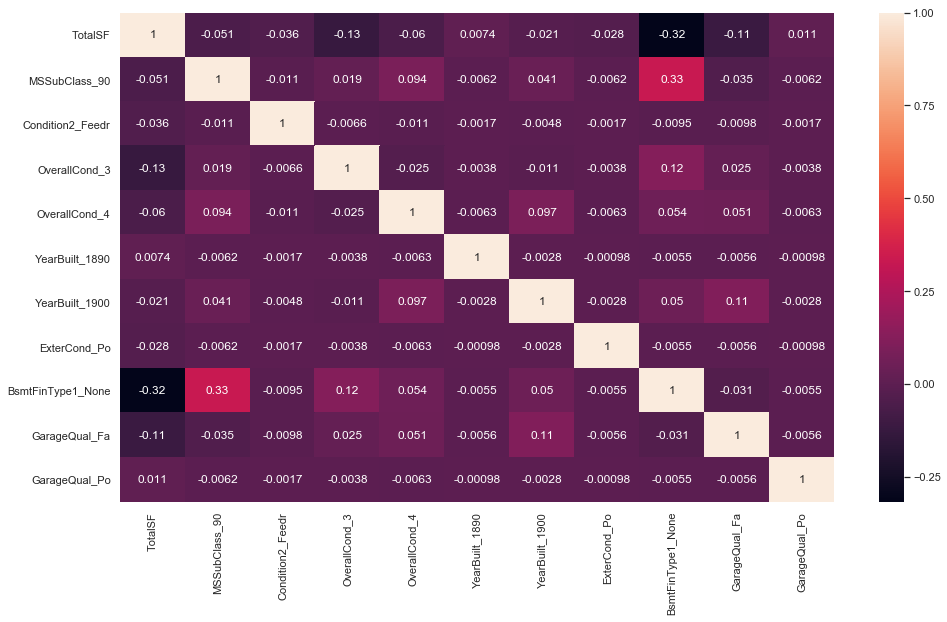

In [943]:
# Final correlation matrix of the model:

plt.figure(figsize = (16,9))  
sns.heatmap(X.corr(),annot = True)

Text(0.5, 0, 'Errors')

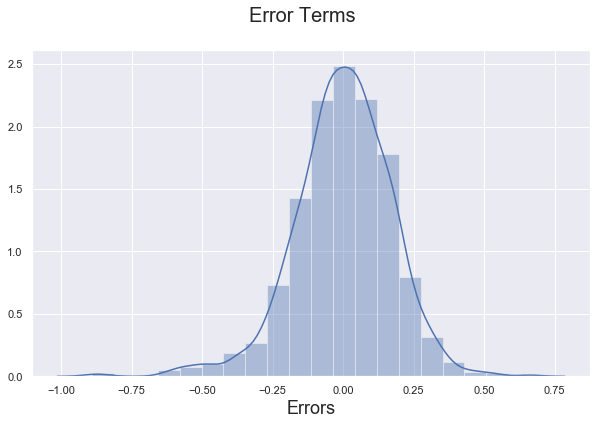

In [944]:
# Residual Analysis of the train data:

# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

# Importing the required libraries for plots.

%matplotlib inline

y_train_predict = lr_10.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure(figsize = (10,6))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



In [945]:
# Inferences:

# Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled
# for our model.

In [946]:
# Making Predictions Using the Final Model:

# Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions 
# using the final, i.e. 10th model.


In [947]:
# checking test data:
df_house_test.head()

LotFrontage   LotArea  OverallQual  YearRemodAdd  MasVnrArea  \
497     -0.145258 -0.288780    -0.832945      0.910237    0.440026   
1262    -1.839527 -1.533681    -0.111814      0.667707   -0.768381   
411      1.324078  2.558284    -0.832945     -1.466557   -0.768381   
1047    -0.385350  0.384366    -1.554077      1.007249   -0.768381   
1034     0.895200  0.670886     2.051579      1.104261    0.305267   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
497     0.167596   -0.351181  -0.151165    -0.429625 -0.657606 -0.805617   
1262   -0.258928   -0.351181   1.221595     0.830669  0.588380 -0.805617   
411     1.347614   -0.351181  -1.809131     0.023836 -0.151973 -0.805617   
1047   -1.120412   -0.351181  -1.809131    -2.682221 -0.551072 -0.805617   
1034    1.286886   -0.351181   0.256884     1.318783  1.190109 -0.805617   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
497      -0.144258  -1.423595     -0.794398     -0.255396 -1.078162 -0.771569   
1262     -0.144258  -0.255824      1.156595     -0.255396  0.740790 -0.771569   
411      -0.144258  -0.954628      1.156595     -0.255396 -1.078162 -0.771569   
1047     -0.144258  -1.325340     -0.794398     -0.255396 -1.078162 -0.771569   
1034     -0.144258   0.322963      1.156595     -0.255396  0.740790 -0.771569   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
497       0.133182     -0.216124     -0.976474   -0.983434       1967.0   
1262     -1.067811     -0.216124     -0.976474   -0.983434       1998.0   
411       0.133182     -0.216124     -0.976474   -0.983434       1955.0   
1047     -1.067811     -0.216124     -0.281099   -0.983434       1946.0   
1034     -1.067811     -0.216124     -0.281099    0.617870       2008.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
497    -1.033378   -0.869585    0.018490    -0.995574      -0.378905   
1262    0.299549    0.165234    0.648887     0.661959      -0.378905   
411     0.299549    0.448302    1.394616    -0.995574      -0.378905   
1047   -1.033378   -0.776776   -0.837468    -0.995574      -0.378905   
1034    1.632476    2.026053    1.186276    -0.995574      -0.378905   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal  SalePrice   TotalSF  \
497   -0.129057    -0.291063 -0.062543 -0.208448  11.775297 -1.127326   
1262  -0.129057    -0.291063 -0.062543 -0.208448  12.106258  0.355301   
411   -0.129057    -0.291063 -0.062543 -0.208448  11.884496 -0.163248   
1047  -0.129057    -0.291063 -0.062543 -0.208448  11.349241 -2.431357   
1034  -0.129057    -0.291063 -0.062543 -0.208448  12.661917  1.170769   

      PercentLivingtoLot  TotalBath  YearSinceLastRemodel  house_age  HasPool  \
497            -0.479672  -1.582885             -0.951982   0.384218        0   
1262            1.923038   1.001987             -0.424065  -0.785930        0   
411            -2.907582  -0.290449              1.236555   0.631168        0   
1047           -2.446027  -1.582885             -1.233512   0.957088        0   
1034            0.070219   1.001987             -1.578221  -1.310375        0   

      Has2ndFloor  HasGarage  HasBsmt  HasFireplace  MSSubClass_160  \
497             0          1        1             0               0   
1262            0          1        1             0               0   
411             0          1        1             0               0   
1047            0          1        0             0               0   
1034            0          1        1             1               0   

      MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
497                0               0              1              0   
1262               0               0              0              0   
411                0               1              0              0   
1047               0               0              1              0   
1034               0               0              1   

In [948]:
#Dividing into X and y:
y_test = df_house_test.pop('SalePrice')
X_test = df_house_test


In [949]:
X.head()

TotalSF  MSSubClass_90  Condition2_Feedr  OverallCond_3  OverallCond_4  \
471  -1.054841              0                 0              0              0   
1029  1.170769              0                 0              1              0   
435   0.124717              0                 0              0              0   
1260  0.210846              0                 0              0              0   
1007 -1.256019              0                 0              0              0   

      YearBuilt_1890  YearBuilt_1900  ExterCond_Po  BsmtFinType1_None  \
471                0               0             0                  0   
1029               0               0             0                  0   
435                0               0             0                  0   
1260               0               0             0                  0   
1007               0               0             0                  0   

      GarageQual_Fa  GarageQual_Po  
471               0              0  
1029              0              0  
435               0              0  
1260              0              0  
1007              0              0

In [950]:
X_train_lm.head()

const   TotalSF  MSSubClass_90  Condition2_Feedr  OverallCond_3  \
471     1.0 -1.054841              0                 0              0   
1029    1.0  1.170769              0                 0              1   
435     1.0  0.124717              0                 0              0   
1260    1.0  0.210846              0                 0              0   
1007    1.0 -1.256019              0                 0              0   

      OverallCond_4  YearBuilt_1890  YearBuilt_1900  ExterCond_Po  \
471               0               0               0             0   
1029              0               0               0             0   
435               0               0               0             0   
1260              0               0               0             0   
1007              0               0               0             0   

      BsmtFinType1_None  GarageQual_Fa  GarageQual_Po  
471                   0              0              0  
1029                  0              0              0  
435                   0              0              0  
1260                  0              0              0  
1007                  0              0              0

In [951]:
# Making predictions:

#X_train_lm = X_train_lm.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_lm.columns]
X = X_test[X.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
X = sm.add_constant(X)


In [952]:
# Making predictions 
#y_pred = lr_15.predict(X_test_new)

y_pred = lr_10.predict(X)

In [953]:
# Evaluate the model using the r2_score for train data:
from sklearn.metrics import r2_score

round(metrics.r2_score(y_true=y_train, y_pred=y_train_predict),3)

0.819

In [954]:
# Evaluate the model using the r2_score for test data:

round(r2_score(y_test, y_pred),3)
#metrics.r2_score(y_true=y_test, y_pred=y_pred)

0.755

Text(0, 0.5, 'y_pred')

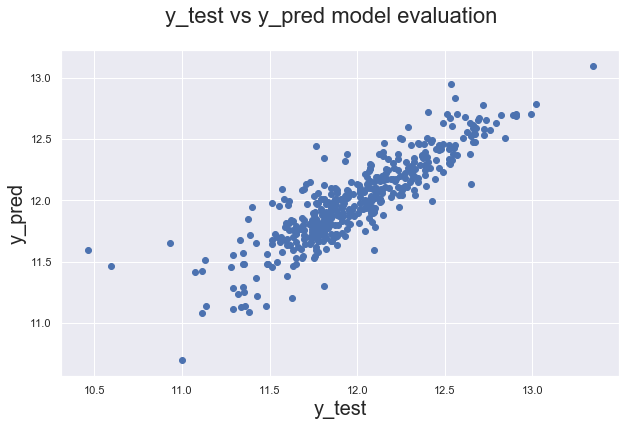

In [955]:
# Plotting y_test and y_pred to understand the data spread :

fig = plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred model evaluation', fontsize=22)              # Plot heading 
plt.xlabel('y_test', fontsize=20)                          # X-label
plt.ylabel('y_pred', fontsize=20)                          # Y-label

Text(0.5, 0, 'Errors')

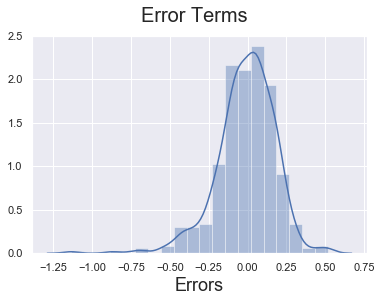

In [956]:
# # So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


In [957]:
from sklearn import metrics
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)


SyntaxError: unexpected EOF while parsing (<ipython-input-957-7637465fef5d>, line 2)

In [958]:
# Evaluation of model using summary statistics:

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     415.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:25:47   Log-Likelihood:                 345.92
No. Observations:                1019   AIC:                            -667.8
Df Residuals:                    1007   BIC:                            -608.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0632      0.00

In [959]:
# Conclusions from MLR model :

# 1. R-squared value of the model is 0.819 (~82 %) data variance explained by our regression model.Also is a decent R-squared 
#    value. This means 82 % of the price value(target variable) variance is explained by the variables we have selected in
#    the model.
# 2. The R square and Adjusted R square value in model is almost same which are 0.819 and 0.817 respectively 
#    which indicates that none of the parameters in our model are reduntant. (Less than 1 % variance)
# 3. From Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not 
#    follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.
#    Also the error terms are also normally distributed which is basic assumption of linear regression.
# 4. The RSME value is 0.18983707926915477 which is quite low. 
# 5. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
#    predictors are statistically significant.
# 6. F-stats and Prob(F-stats) (overall model fit) - 415.0 and 0 - Model fit is significant and is just 
#    not by chance.
# 7. As we can see that the model seems to be stable, The variables that can affect price are as below in the order of the 
#    significance starting from highest significance:
#       1 ExterCond_Po (-ve value indicates the present condition of the material on the exterior should not be poor)
#       2 YearBuilt_1890 (-ve value indicates Original construction date should not be too old)
#       3 OverallCond_3 (-ve value indicates overall condition of the house should not be just fair)
#       4 GarageQual_Po (-ve value indicates Garage quality should not be Poor) 
#       5 TotalSF (+ve value indicates the total build area should be more) 
#       6 YearBuilt_1900 (-ve value indicates Original construction date should not be too old)
#       7 Condition2_Feedr (-ve value indicates Adjacent to feeder street house is not desirable)
#       8 BsmtFinType1_None (Rating of basement finished area is Not given)
#       9 OverallCond_4 (-ve value indicates below average overall condition of the house is not desirable)
#       10 MSSubClass_90 (-ve value indicates Duplex home is not preferred)


## 2. 1  : Regression model using Ridge:

In [960]:
# Let's use the dataframe housing_price_ridge_df
housing_price_ridge_df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0         60       RL    13.819935  9.091255   Pave      Reg         Lvl   
1         20       RL    15.490967  9.220239   Pave      Reg         Lvl   
2         60       RL    14.168559  9.380598   Pave      IR1         Lvl   
3         70       RL    13.220390  9.214960   Pave      IR1         Lvl   
4         60       RL    15.909206  9.620371   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual OverallCond YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7           5      2003          2003     Gable   
1     1Story            6           8      1976          1976     Gable   
2     2Story            7           5      2001          2002     Gable   
3     2Story            7           5      1915          1970     Gable   
4     2Story            8           5      2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   19.455306        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   17.788196        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None    0.000000        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   25.437010        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ  189.374823   
1     CBlock       Gd       TA           Gd          ALQ  242.742427   
2      PConc       Gd       TA           Mn          GLQ  142.432753   
3     BrkTil       TA       Gd           No          ALQ   76.570648   
4      PConc       Gd       TA           Av          GLQ  178.853171   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0  30.309818   521.101046    GasA        Ex   
1          Unf         0.0  44.679287   743.015004    GasA        Ex   
2          Unf         0.0  57.663327   556.600844    GasA        Ex   
3          Unf         0.0  65.721328   465.162482    GasA        Gd   
4          Unf         0.0  62.011144   679.804428    GasA        Ex   

  CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.607447  1290.689134           0.0  10.253330   
1          Y      SBrkr  6.978143     0.000000           0.0   9.701856   
2          Y      SBrkr  6.676362  1310.119602           0.0  10.333403   
3          Y      SBrkr  6.718022  1132.758571           0.0  10.260840   
4          Y      SBrkr  6.885308  1615.249822           0.0  10.719597   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      0.994137      0.000000         2   1.07115             3      0.717368   
1      0.000000      0.682746         2   0.00000             3      0.717368   
2      0.994137      0.000000         2   1.07115             3      0.717368   
3      0.994137      0.000000         1   0.00000             3      0.717368   
4      0.994137      0.000000         2   1.07115             4      0.717368   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd      2.601966        Typ    0.000000        None     Attchd   
1          TA      2.259193        Typ    0.925372          TA     Attchd   
2          Gd      2.259193        Typ    0.925372          TA     Attchd   
3          Gd      2

In [961]:
# Dividing data into X and y variables for model building:

y = housing_price_ridge_df.pop('SalePrice')
X = housing_price_ridge_df

In [962]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallCond YearBuilt RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           5      2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           8      1976     Gable  CompShg     MetalSd     MetalSd       None   
2           5      2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           5      1915     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           5      2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
1          Unf    GasA        Ex          Y      SBrkr          TA        Typ   
2          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
3          Unf    GasA        Gd          Y      SBrkr          Gd        Typ   
4          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive MoSold  \
0        None     Attchd          RFn         TA         TA          Y      2   
1          TA     Attchd          RFn         TA         TA          Y      5   
2          TA     Attchd          RFn         TA         TA          Y      9   
3          Gd     Detchd          Unf         TA         TA          Y      2   
4          TA     Attchd          RFn         TA         TA          Y     12   

  YrSold SaleType SaleCondition  
0   2008       WD        Normal  
1   2007       WD        Normal  
2   2008       WD        Normal  
3   2006       WD       Abnorml  
4   2008       WD        Normal

In [963]:
# convert into dummies :
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edward

In [964]:
# drop categorical variables :
X = X.drop(list(house_categorical.columns), axis=1)

In [965]:
# concat dummy variables with X :
X = pd.concat([X, house_dummies], axis=1)

In [966]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=394)

In [967]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [968]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [969]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.016799      0.001600           0.0000        0.000000      0.0001   
1       0.015999      0.000002           0.0000        0.000000       0.001   
2       0.023199      0.005880           0.0008        0.001599        0.01   
3       0.019199      0.001601           0.0008        0.001601        0.05   
4       0.014126      0.002995           0.0000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.110920          -0.106754          -0.111890   
1   {'alpha': 0.001}          -0.108064          -0.106422          -0.111834   
2    {'alpha': 0.01}          -0.104592          -0.105302          -0.111242   
3    {'alpha': 0.05}          -0.101423          -0.104567          -0.108909   
4     {'alpha': 0.1}          -0.099296          -0.104279          -0.106841   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.103420          -0.115501        -0.109691        0.004195   
1          -0.103104          -0.114320        -0.108743        0.003956   
2          -0.101365          -0.112121        -0.106920        0.004113   
3          -0.098509          -0.111106        -0.104897        0.004638   
4          -0.096751          -0.110636        -0.103554        0.005015   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.045889           -0.044527   
1               27           -0.045962           -0.044493   
2               26           -0.046027           -0.044445   
3               25           -0.046077           -0.044445   
4               24           -0.046110           -0.044457   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.046331           -0.047429           -0.044930   
1           -0.046330           -0.047424           -0.044934   
2           -0.046325           -0.047427           -0.045137   
3           -0.046317           -0.047525           -0.045249   
4           -0.046313           -0.047617           -0.045281   

   mean_train_score  std_train_score  
0         -0.045821         0.001032  
1         -0.045829         0.001039  
2         -0.045872         0.001022  
3         -0.045922         0.001038  
4         -0.045956         0.001059

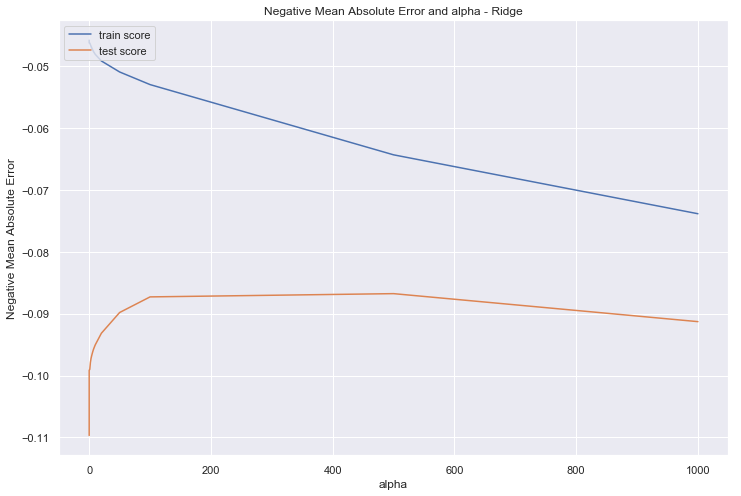

In [970]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12, 8))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha - Ridge")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [974]:
# model with optimal alpha:

# Ridge regression:
ridge = Ridge(alpha=550)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9462031402551241
0.896659463859245


In [977]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.5507785409780489


In [978]:
# Ridge model parameters:

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Ridge with the correspondage weightage as below:")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('LotFrontage', 0.011),
 ('LotArea', 0.02),
 ('OverallQual', 0.035),
 ('YearRemodAdd', 0.012),
 ('MasVnrArea', 0.008),
 ('BsmtFinSF1', 0.018),
 ('BsmtFinSF2', 0.001),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.026),
 ('1stFlrSF', 0.026),
 ('2ndFlrSF', 0.015),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.031),
 ('BsmtFullBath', 0.006),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.012),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.007),
 ('TotRmsAbvGrd', 0.014),
 ('Fireplaces', 0.011),
 ('GarageYrBlt', 0.002),
 ('GarageCars', 0.013),
 ('GarageArea', 0.014),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.008),
 ('EnclosedPorch', 0.001),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.008),
 ('PoolArea', 0.003),
 ('MiscVal', -0.0),
 ('TotalSF', 0.031),
 ('PercentLivingtoLot', -0.0),
 ('TotalBath', 0.016),
 ('YearSinceLastRemodel', -0.011),
 ('house_age', -0.012),
 ('HasPool', 0.003),
 ('Has2ndFloor', 0.006),
 ('HasGarage', 0.001),
 ('HasBsmt', 0.001),
 ('Has

## 2. 2  : Regression model using Lasso:

In [979]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [980]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.15]
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.228996      0.041335         0.000000        0.000000      0.0001   
1       0.089417      0.036882         0.000800        0.001599       0.001   
2       0.018747      0.006247         0.000000        0.000000        0.01   
3       0.012497      0.006249         0.000000        0.000000        0.05   
4       0.009372      0.007652         0.003124        0.006248         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.886373           0.862901           0.901047   
1   {'alpha': 0.001}           0.912519           0.880114           0.926515   
2    {'alpha': 0.01}           0.920586           0.879736           0.927665   
3    {'alpha': 0.05}           0.865896           0.802273           0.862473   
4     {'alpha': 0.1}           0.778394           0.729981           0.793231   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.881752           0.841864         0.874820        0.020466   
1           0.918080           0.891813         0.905822        0.017210   
2           0.908402           0.911176         0.909511        0.016395   
3           0.838957           0.857320         0.845372        0.023482   
4           0.766721           0.787147         0.771079        0.022413   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.973414            0.975339   
1                2            0.965587            0.969251   
2                1            0.926249            0.930166   
3                4            0.838244            0.859269   
4                5            0.759091            0.783910   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.973787            0.972338            0.975344   
1            0.965517            0.964529            0.967418   
2            0.923450            0.926845            0.927275   
3            0.843022            0.852302            0.847170   
4            0.766824            0.781066            0.775309   

   mean_train_score  std_train_score  
0          0.974044         0.001161  
1          0.966461         0.001679  
2          0.926797         0.002149  
3          0.848001         0.007296  
4          0.773240         0.009173

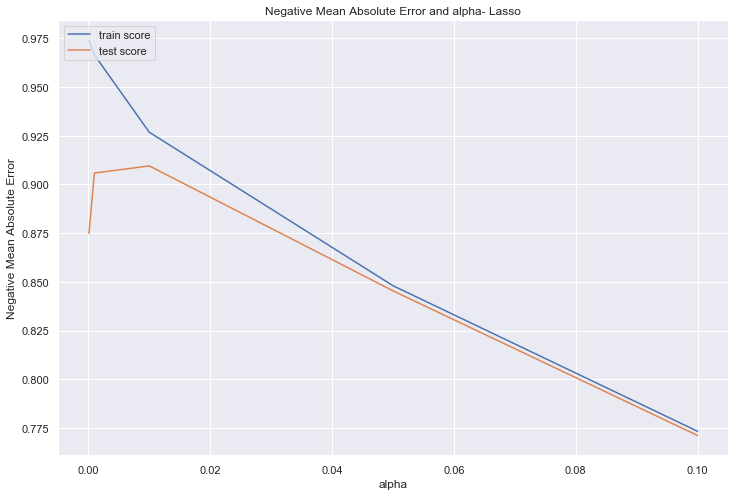

In [981]:
# plotting mean test and train scoes with alpha 
#cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(12, 8))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha- Lasso")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [983]:
# model with optimal alpha:

# lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9239090984504866
0.8879202238641652


In [985]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.5507785409780489


In [988]:
# lasso model parameters:

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Lasso with the correspondage weightage as below:")
list(zip(cols, model_parameters))

Below variables are choosen by Lasso with the correspondage weightage as below:


[('constant', 12.023),
 ('LotFrontage', 0.0),
 ('LotArea', 0.032),
 ('OverallQual', 0.098),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.051),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.009),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.014),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.005),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.002),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('TotalSF', 0.128),
 ('PercentLivingtoLot', -0.0),
 ('TotalBath', 0.019),
 ('YearSinceLastRemodel', -0.032),
 ('house_age', -0.038),
 ('HasPool', 0.0),
 ('Has2ndFloor', 0.0),
 ('HasGarage', 0.0),
 ('HasBsmt', -0.0),
 ('HasFireplace', 0.0),
 ('MSSubClass_160', -0.0),
 

#      ############################### End of Assignment 